In [1]:
# %%writefile word2vec.py

UsageError: %%writefile is a cell magic, but the cell body is empty.


In [ ]:
# !pip install gensim

In [ ]:
### Imports
import pandas as pd
import numpy as np
import os
import gensim

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
plt.style.use(['fivethirtyeight'])

%matplotlib inline

#EDA

# from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Pandas Profiling Report')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import klib


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

from sklearn.base import ClassifierMixin
from sklearn.ensemble import StackingClassifier

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

import gensim

In [3]:
path = "/usr/local/share/fonts"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Ubuntu':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

Unknown system...


In [15]:
os.getcwd()

'C:\\Users\\송한솔\\머신러닝 제출 압축용\\src'

# 1 **EDA**


In [17]:
train = pd.read_csv(os.path.abspath("../dat")+'/train_transactions.csv', encoding='cp949')

test = pd.read_csv(os.path.abspath("../dat")+'/test_transactions.csv', encoding='cp949')

y_train = pd.read_csv(os.path.abspath("../dat")+'/y_train.csv').gender

train_id = train['cust_id']
test_id = test['cust_id']


tr = pd.concat([train, test]).reset_index(drop=True)
tr

,cust_id,tran_date,store_nm,goods_id,gds_grp_nm,gds_grp_mclas_nm,amount
0,0,2007-01-19 00:00:00,강남점,127105,기초 화장품,화장품,850000
1,0,2007-03-30 00:00:00,강남점,342220,니 트,시티웨어,480000
2,0,2007-03-30 00:00:00,강남점,127105,기초 화장품,화장품,3000000
3,0,2007-03-30 00:00:00,강남점,342205,니 트,시티웨어,840000
4,0,2007-03-30 00:00:00,강남점,342220,상품군미지정,기타,20000
...,...,...,...,...,...,...,...
395557,5981,2007-01-12 00:00:00,영등포점,50105,일반가공식품,가공식품,209000
395558,5981,2007-01-12 00:00:00,영등포점,50109,상품군미지정,기타,7150
395559,5981,2007-01-12 00:00:00,영등포점,50105,햄,축산가공,9500
395560,5981,2007-01-12 00:00:00,영등포점,50105,상품군미지정,기타,9500


# 2.  **Feature Enginering**


In [5]:
features = pd.DataFrame({'cust_id': tr.cust_id.unique()})
features

,cust_id
0,0
1,1
2,2
3,3
4,4
...,...
5977,5977
5978,5978
5979,5979
5980,5980


In [6]:
level = 'gds_grp_nm'

features = pd.pivot_table(tr, index='cust_id', columns=level, values='amount',
                            aggfunc=lambda x: len(x), fill_value=0).reset_index()
# #train_test = pd.pivot_table(pd.concat([df_train, df_test]), index='cust_id', columns=level, values='amount',
# #                            aggfunc=lambda x: np.where(len(x) >=1, 1, 0), fill_value=0).reset_index()

features

gds_grp_nm,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,한실침구,한차,햄,햄세트,향수,헤어ACC,홈웨어,화장품,회,휴지류
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
f = tr.groupby('cust_id')['amount'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max),
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,향수,헤어ACC,홈웨어,화장품,회,휴지류,총구매액,구매건수,평균구매액,최대구매액
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,68282840,74,922741,11264000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2136000,3,712000,2136000
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3197000,4,799250,1639000
3,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,16077620,44,365400,4935000
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,29050000,3,9683333,24000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,0,0,0,0,0,82581500,14,5898679,23976000
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,480000,1,480000,480000
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,260003790,71,3662025,25750000
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,88991520,18,4943973,18120000


In [8]:
x = pd.to_datetime(tr.tran_date, format="%Y-%m-%d %H:%M").dt.month
x.groupby(features['cust_id'])
features['월'] = x

features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,헤어ACC,홈웨어,화장품,회,휴지류,총구매액,구매건수,평균구매액,최대구매액,월
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,68282840,74,922741,11264000,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2136000,3,712000,2136000,3
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3197000,4,799250,1639000,3
3,3,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,16077620,44,365400,4935000,3
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,29050000,3,9683333,24000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,0,0,0,0,82581500,14,5898679,23976000,2
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,480000,1,480000,480000,2
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,260003790,71,3662025,25750000,2
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,88991520,18,4943973,18120000,2


In [9]:
x = pd.to_datetime(tr.tran_date, format="%Y-%m-%d %H:%M").dt.day
x.groupby(features['cust_id'])
features['일'] = x

features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,홈웨어,화장품,회,휴지류,총구매액,구매건수,평균구매액,최대구매액,월,일
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,68282840,74,922741,11264000,1,19
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2136000,3,712000,2136000,3,30
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3197000,4,799250,1639000,3,30
3,3,0,0,0,0,0,1,0,0,0,...,0,0,1,0,16077620,44,365400,4935000,3,30
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,29050000,3,9683333,24000000,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,0,0,0,82581500,14,5898679,23976000,2,3
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,480000,1,480000,480000,2,3
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,0,260003790,71,3662025,25750000,2,3
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,88991520,18,4943973,18120000,2,3


In [10]:
# f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([
#     (('최대제품', np.max))
# ]).reset_index()
# features = features.merge(f, how='left', left_index=False); features

In [11]:
#  휴면 여부
f = tr.groupby('cust_id')['tran_date'].agg([
     ('휴면_여부', lambda x: int((tr.tran_date.astype('datetime64').max() - x.astype('datetime64').max()).days))
 ]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,화장품,회,휴지류,총구매액,구매건수,평균구매액,최대구매액,월,일,휴면_여부
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,68282840,74,922741,11264000,1,19,7
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2136000,3,712000,2136000,3,30,67
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,3197000,4,799250,1639000,3,30,355
3,3,0,0,0,0,0,1,0,0,0,...,0,1,0,16077620,44,365400,4935000,3,30,17
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,29050000,3,9683333,24000000,3,30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,0,0,82581500,14,5898679,23976000,2,3,30
5978,5978,0,0,0,0,0,0,0,0,0,...,0,0,0,480000,1,480000,480000,2,3,343
5979,5979,0,0,0,0,0,0,1,0,0,...,0,0,0,260003790,71,3662025,25750000,2,3,1
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,0,88991520,18,4943973,18120000,2,3,23


In [12]:
f = tr.query('gds_grp_mclas_nm == "화장품"').groupby('cust_id')['amount'].agg([
    ('화장품 구매금액', np.sum),
    ('화장품 구매건수', np.size)
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,휴지류,총구매액,구매건수,평균구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,화장품 구매건수
0,0,0,0,0,0,0,0,0,0,0,...,0,68282840,74,922741,11264000,1,19,7,22450000.0,7.0
1,1,0,0,0,0,0,0,0,0,0,...,0,2136000,3,712000,2136000,3,30,67,NaN,NaN
2,2,0,0,0,0,0,0,0,0,0,...,0,3197000,4,799250,1639000,3,30,355,NaN,NaN
3,3,0,0,0,0,0,1,0,0,0,...,0,16077620,44,365400,4935000,3,30,17,NaN,NaN
4,4,0,0,0,0,0,0,0,0,0,...,0,29050000,3,9683333,24000000,3,30,47,2050000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,82581500,14,5898679,23976000,2,3,30,NaN,NaN
5978,5978,0,0,0,0,0,0,0,0,0,...,0,480000,1,480000,480000,2,3,343,NaN,NaN
5979,5979,0,0,0,0,0,0,1,0,0,...,0,260003790,71,3662025,25750000,2,3,1,NaN,NaN
5980,5980,0,0,0,0,0,0,0,0,0,...,0,88991520,18,4943973,18120000,2,3,23,NaN,NaN


In [13]:
f = tr.groupby('cust_id')['tran_date'].agg([
       ('평일방문비율', lambda x: np.mean(pd.to_datetime(x).dt.dayofweek>4))
    ]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,총구매액,구매건수,평균구매액,최대구매액,월,일,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율
0,0,0,0,0,0,0,0,0,0,0,...,68282840,74,922741,11264000,1,19,7,22450000.0,7.0,0.527027
1,1,0,0,0,0,0,0,0,0,0,...,2136000,3,712000,2136000,3,30,67,NaN,NaN,0.000000
2,2,0,0,0,0,0,0,0,0,0,...,3197000,4,799250,1639000,3,30,355,NaN,NaN,0.000000
3,3,0,0,0,0,0,1,0,0,0,...,16077620,44,365400,4935000,3,30,17,NaN,NaN,0.318182
4,4,0,0,0,0,0,0,0,0,0,...,29050000,3,9683333,24000000,3,30,47,2050000.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,82581500,14,5898679,23976000,2,3,30,NaN,NaN,0.642857
5978,5978,0,0,0,0,0,0,0,0,0,...,480000,1,480000,480000,2,3,343,NaN,NaN,0.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,260003790,71,3662025,25750000,2,3,1,NaN,NaN,0.915493
5980,5980,0,0,0,0,0,0,0,0,0,...,88991520,18,4943973,18120000,2,3,23,NaN,NaN,0.444444


In [14]:
f = tr.groupby('cust_id')['tran_date'].agg([
    ('내점일수',lambda x: x.str[:10].nunique()),
    ('구매주기', lambda x: int((x.astype('datetime64').max() - x.astype('datetime64').min()).days / x.str[:10].nunique())),
    ('봄-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([1,2,12])))
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,휴면_여부,화장품 구매금액,화장품 구매건수,평일방문비율,내점일수,구매주기,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율
0,0,0,0,0,0,0,0,0,0,0,...,7,22450000.0,7.0,0.527027,19,17,0.094595,0.391892,0.378378,0.135135
1,1,0,0,0,0,0,0,0,0,0,...,67,NaN,NaN,0.000000,2,1,0.000000,0.000000,1.000000,0.000000
2,2,0,0,0,0,0,0,0,0,0,...,355,NaN,NaN,0.000000,2,1,0.000000,0.000000,0.000000,1.000000
3,3,0,0,0,0,0,1,0,0,0,...,17,NaN,NaN,0.318182,18,16,0.590909,0.159091,0.113636,0.136364
4,4,0,0,0,0,0,0,0,0,0,...,47,2050000.0,1.0,0.000000,2,85,0.333333,0.000000,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,30,NaN,NaN,0.642857,8,40,0.071429,0.285714,0.285714,0.357143
5978,5978,0,0,0,0,0,0,0,0,0,...,343,NaN,NaN,0.000000,1,0,0.000000,0.000000,0.000000,1.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,1,NaN,NaN,0.915493,19,18,0.154930,0.225352,0.154930,0.464789
5980,5980,0,0,0,0,0,0,0,0,0,...,23,NaN,NaN,0.444444,5,60,0.277778,0.166667,0.277778,0.277778


In [15]:
f = tr[tr.amount < 0].groupby('cust_id')['amount'].agg([
    ('환불금액', lambda x: x.sum() * -1),
    ('환불건수', np.size)
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,화장품 구매건수,평일방문비율,내점일수,구매주기,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수
0,0,0,0,0,0,0,0,0,0,0,...,7.0,0.527027,19,17,0.094595,0.391892,0.378378,0.135135,6860000.0,3.0
1,1,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,2,1,0.000000,0.000000,1.000000,0.000000,300000.0,1.0
2,2,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,2,1,0.000000,0.000000,0.000000,1.000000,NaN,NaN
3,3,0,0,0,0,0,1,0,0,0,...,NaN,0.318182,18,16,0.590909,0.159091,0.113636,0.136364,NaN,NaN
4,4,0,0,0,0,0,0,0,0,0,...,1.0,0.000000,2,85,0.333333,0.000000,0.666667,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,NaN,0.642857,8,40,0.071429,0.285714,0.285714,0.357143,NaN,NaN
5978,5978,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,1,0,0.000000,0.000000,0.000000,1.000000,NaN,NaN
5979,5979,0,0,0,0,0,0,1,0,0,...,NaN,0.915493,19,18,0.154930,0.225352,0.154930,0.464789,NaN,NaN
5980,5980,0,0,0,0,0,0,0,0,0,...,NaN,0.444444,5,60,0.277778,0.166667,0.277778,0.277778,NaN,NaN


In [16]:
visits = tr.groupby('cust_id')['tran_date'].agg(lambda x: x.nunique())
f = (tr.groupby('cust_id')['amount'].sum() / visits).reset_index().rename(columns={0 : "내점당구매액"})
features = features.merge(f, how='left'); features
f = (tr.groupby('cust_id')['amount'].size() / visits).reset_index().rename(columns={0 : "내점당구매건수"})
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,내점일수,구매주기,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수
0,0,0,0,0,0,0,0,0,0,0,...,19,17,0.094595,0.391892,0.378378,0.135135,6860000.0,3.0,3.593834e+06,3.894737
1,1,0,0,0,0,0,0,0,0,0,...,2,1,0.000000,0.000000,1.000000,0.000000,300000.0,1.0,1.068000e+06,1.500000
2,2,0,0,0,0,0,0,0,0,0,...,2,1,0.000000,0.000000,0.000000,1.000000,NaN,NaN,1.598500e+06,2.000000
3,3,0,0,0,0,0,1,0,0,0,...,18,16,0.590909,0.159091,0.113636,0.136364,NaN,NaN,8.932011e+05,2.444444
4,4,0,0,0,0,0,0,0,0,0,...,2,85,0.333333,0.000000,0.666667,0.000000,NaN,NaN,1.452500e+07,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,8,40,0.071429,0.285714,0.285714,0.357143,NaN,NaN,1.032269e+07,1.750000
5978,5978,0,0,0,0,0,0,0,0,0,...,1,0,0.000000,0.000000,0.000000,1.000000,NaN,NaN,4.800000e+05,1.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,19,18,0.154930,0.225352,0.154930,0.464789,NaN,NaN,1.368441e+07,3.736842
5980,5980,0,0,0,0,0,0,0,0,0,...,5,60,0.277778,0.166667,0.277778,0.277778,NaN,NaN,1.779830e+07,3.600000


In [17]:
f = tr.groupby('cust_id')['gds_grp_mclas_nm'].agg([
    ('주구매상품', lambda x: x.value_counts().index[0])
]).reset_index()
features = features.merge(f, how='left'); features['주구매상품'].nunique()

42

In [18]:
f = tr.groupby('cust_id')['store_nm'].agg([
    ('주구매지점', lambda x: x.value_counts().index[0])
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,주구매상품,주구매지점
0,0,0,0,0,0,0,0,0,0,0,...,0.094595,0.391892,0.378378,0.135135,6860000.0,3.0,3.593834e+06,3.894737,기타,강남점
1,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,1.000000,0.000000,300000.0,1.0,1.068000e+06,1.500000,스포츠,잠실점
2,2,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,1.000000,NaN,NaN,1.598500e+06,2.000000,남성 캐주얼,관악점
3,3,0,0,0,0,0,1,0,0,0,...,0.590909,0.159091,0.113636,0.136364,NaN,NaN,8.932011e+05,2.444444,기타,광주점
4,4,0,0,0,0,0,0,0,0,0,...,0.333333,0.000000,0.666667,0.000000,NaN,NaN,1.452500e+07,1.500000,화장품,본 점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.071429,0.285714,0.285714,0.357143,NaN,NaN,1.032269e+07,1.750000,골프,부산본점
5978,5978,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,1.000000,NaN,NaN,4.800000e+05,1.000000,섬유잡화,광주점
5979,5979,0,0,0,0,0,0,1,0,0,...,0.154930,0.225352,0.154930,0.464789,NaN,NaN,1.368441e+07,3.736842,남성 캐주얼,본 점
5980,5980,0,0,0,0,0,0,0,0,0,...,0.277778,0.166667,0.277778,0.277778,NaN,NaN,1.779830e+07,3.600000,육류,본 점


In [19]:
tr['tran_month'] = tr['tran_date'].apply(lambda x: x[5:7])

month = tr.groupby([tr['cust_id'],tr['tran_month']])['amount'].count().reset_index()
month.tran_month = month.tran_month.apply(lambda x: int(x))
df = pd.DataFrame(columns = ['cust_id', 'tran_month'])
for cust_id in range(0,5982):
    for tran_month in range(1,13):
        df = df.append(pd.DataFrame([[cust_id, tran_month]], columns = ['cust_id', 'tran_month']))

df = df.merge(month, how='left')
df = df.fillna(0)

df1 = pd.DataFrame(columns = ['cust_id', '기울기'])
for i in range(0,df.cust_id.nunique()):
    a = df.query('cust_id == @i').tran_month
    b = df.query('cust_id == @i').amount
    c = np.polyfit(a, b, 1)[0].round(2)
    df1 = df1.append(pd.DataFrame([[i, c]], columns = ['cust_id', '구매 추세 기울기']))

features = features.merge(df1, how='left')

In [20]:
features.drop(columns= ['기울기'])

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,여름-구매비율,가을-구매비율,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,주구매상품,주구매지점,구매 추세 기울기
0,0,0,0,0,0,0,0,0,0,0,...,0.391892,0.378378,0.135135,6860000.0,3.0,3.593834e+06,3.894737,기타,강남점,0.97
1,1,0,0,0,0,0,0,0,0,0,...,0.000000,1.000000,0.000000,300000.0,1.0,1.068000e+06,1.500000,스포츠,잠실점,0.07
2,2,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,1.000000,NaN,NaN,1.598500e+06,2.000000,남성 캐주얼,관악점,-0.15
3,3,0,0,0,0,0,1,0,0,0,...,0.159091,0.113636,0.136364,NaN,NaN,8.932011e+05,2.444444,기타,광주점,-0.38
4,4,0,0,0,0,0,0,0,0,0,...,0.000000,0.666667,0.000000,NaN,NaN,1.452500e+07,1.500000,화장품,본 점,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.285714,0.285714,0.357143,NaN,NaN,1.032269e+07,1.750000,골프,부산본점,-0.01
5978,5978,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,1.000000,NaN,NaN,4.800000e+05,1.000000,섬유잡화,광주점,-0.04
5979,5979,0,0,0,0,0,0,1,0,0,...,0.225352,0.154930,0.464789,NaN,NaN,1.368441e+07,3.736842,남성 캐주얼,본 점,0.05
5980,5980,0,0,0,0,0,0,0,0,0,...,0.166667,0.277778,0.277778,NaN,NaN,1.779830e+07,3.600000,육류,본 점,-0.01


In [21]:
f = tr.query('gds_grp_mclas_nm == "화장품"').groupby('cust_id')['tran_date'].agg([('화장품구매주기', lambda x: int((x.astype('datetime64').max() - x.astype('datetime64').min()).days / x.str[:10].nunique()))]).reset_index()
features = features.merge(f, how='left');features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,겨울-구매비율,환불금액,환불건수,내점당구매액,내점당구매건수,주구매상품,주구매지점,기울기,구매 추세 기울기,화장품구매주기
0,0,0,0,0,0,0,0,0,0,0,...,0.135135,6860000.0,3.0,3.593834e+06,3.894737,기타,강남점,NaN,0.97,46.0
1,1,0,0,0,0,0,0,0,0,0,...,0.000000,300000.0,1.0,1.068000e+06,1.500000,스포츠,잠실점,NaN,0.07,NaN
2,2,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,NaN,1.598500e+06,2.000000,남성 캐주얼,관악점,NaN,-0.15,NaN
3,3,0,0,0,0,0,1,0,0,0,...,0.136364,NaN,NaN,8.932011e+05,2.444444,기타,광주점,NaN,-0.38,NaN
4,4,0,0,0,0,0,0,0,0,0,...,0.000000,NaN,NaN,1.452500e+07,1.500000,화장품,본 점,NaN,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.357143,NaN,NaN,1.032269e+07,1.750000,골프,부산본점,NaN,-0.01,NaN
5978,5978,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,NaN,4.800000e+05,1.000000,섬유잡화,광주점,NaN,-0.04,NaN
5979,5979,0,0,0,0,0,0,1,0,0,...,0.464789,NaN,NaN,1.368441e+07,3.736842,남성 캐주얼,본 점,NaN,0.05,NaN
5980,5980,0,0,0,0,0,0,0,0,0,...,0.277778,NaN,NaN,1.779830e+07,3.600000,육류,본 점,NaN,-0.01,NaN


In [22]:
food = ['축산가공', '육류', '수산품', '젓갈/반찬', '가공식품', '농산물', '차/커피', '주류']
f = tr.groupby('cust_id')['amount'].agg([('총구매액', np.sum)]).reset_index()
food_amount = tr.query('gds_grp_mclas_nm == @food').groupby('cust_id')['amount'].agg([
    ('식료품구매액', np.sum)
]).reset_index()
f = pd.merge(f, food_amount, on = 'cust_id', how = 'left').fillna(0)
f['식료품구매액비율'] = f['식료품구매액'] / f['총구매액']
features = features.merge(f[['cust_id', '식료품구매액비율']], how = 'left')

In [23]:
price = tr.groupby('goods_id').mean().reset_index().drop(['cust_id'], axis = 1)

price.columns = ['goods_id', 'price']

price_4q = price['price'].quantile([.25,.5,.75])

tr = tr.merge(price, how = 'left')

f = tr.groupby('cust_id')['price'].agg([
    ('고가상품구매율', lambda x : (x > price_4q.iloc[2]).mean().round(2))
]).reset_index()

features = features.merge(f, how='left')

In [24]:
best_sellers = ['농산물', '가공식품', '축산가공', '수산품', '화장품', '디자이너', '시티웨어', '일용잡화', '육류', '차/커피'] # 베스트 셀러 대분류

f = tr.groupby('cust_id')['amount'].agg([('구매건수', np.size)]).reset_index()

b_s = tr.query('gds_grp_mclas_nm == @best_sellers').groupby('cust_id')['amount'].agg([
    ('베스트셀러구매건수', np.size)
]).reset_index()

f = pd.merge(f, b_s, on = 'cust_id', how = 'left').fillna(0)

f['베스트셀러구매비율'] = f['베스트셀러구매건수'] / f['구매건수']
features = features.merge(f[['cust_id', '베스트셀러구매비율']], how = 'left')

In [25]:
f = tr.groupby('cust_id')['amount'].agg([('구매건수', np.size)]).reset_index()

g = tr[tr.amount < 0].groupby('cust_id')['amount'].agg([('환불건수', np.size)]).reset_index()

f = f.merge(g, how = 'left').fillna(0)
f['환불비율'] = f['환불건수'] / f['구매건수']

features = features.merge(f[['cust_id', '환불비율']], how = 'left')

In [26]:
f = tr.query("gds_grp_nm == '스타킹(특정)'").groupby('cust_id')['amount'].agg([
    ('스타킹구매건수', np.size)
]).reset_index()

features = features.merge(f, how='left')

In [27]:
r = tr.groupby('cust_id')['tran_date'].agg([
    ('구매주기', lambda x: int((x.astype('datetime64').max() - x.astype('datetime64').min()).days / x.str[:10].nunique()))]).reset_index()
f = tr.groupby('cust_id')['amount'].agg([ 
    ('구매건수', np.size)]).reset_index()
m = tr.groupby('cust_id')['amount'].agg([ 
    ('총구매액', np.sum)]).reset_index()
rfm = r.merge(f).merge(m)
r_labels = range(4, 0, -1) 
f_labels = range(1, 5)
m_labels = range(1, 5)

rfm['r'] = pd.qcut(rfm['구매주기'], q=4, labels=r_labels).astype(int)
rfm['f'] = pd.qcut(rfm['구매건수'], q=4, labels=f_labels).astype(int)
rfm['m'] = pd.qcut(rfm['총구매액'], q=4, labels=m_labels).astype(int)
rfm_s = [2, 2, 3]
rfm['rfm'] = rfm_s[0] * rfm['r'] + rfm_s[1] * rfm['f'] + rfm_s[2] * rfm['m']
seg_map = { 
    r'[1-2][1-2]': '수면고객',
    r'13': '이탈위험고객',
    r'14': '관심대상고객',
    r'23': '3등급고객',
    r'24': '2.5등급고객',
    r'[3-4]1': '신규고객',
    r'32': '3등급고객',
    r'42': '2.5등급고객',
    r'33': '2등급고객',
    r'43': '1등급고객',
    r'34': '1등급고객',
    r'44': 'vip고객'
}

rfm['고객등급'] = rfm['r'].map(str) + rfm['f'].map(str)
rfm['고객등급'] = rfm['고객등급'].replace(seg_map, regex=True)
rfm = rfm.drop("구매주기", axis=1)
rfm = rfm.drop("구매건수", axis=1)
rfm = rfm.drop("총구매액", axis=1)
rfm = rfm.drop("r", axis=1)
rfm = rfm.drop("f", axis=1)
rfm = rfm.drop("m", axis=1)
rfm = rfm.drop("rfm", axis=1)
features = features.merge(rfm, how='left');features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,주구매지점,기울기,구매 추세 기울기,화장품구매주기,식료품구매액비율,고가상품구매율,베스트셀러구매비율,환불비율,스타킹구매건수,고객등급
0,0,0,0,0,0,0,0,0,0,0,...,강남점,NaN,0.97,46.0,0.025218,0.24,0.513514,0.040541,NaN,3등급고객
1,1,0,0,0,0,0,0,0,0,0,...,잠실점,NaN,0.07,NaN,0.000000,0.33,0.000000,0.333333,NaN,신규고객
2,2,0,0,0,0,0,0,0,0,0,...,관악점,NaN,-0.15,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객
3,3,0,0,0,0,0,1,0,0,0,...,광주점,NaN,-0.38,NaN,0.237317,0.07,0.545455,0.000000,2.0,3등급고객
4,4,0,0,0,0,0,0,0,0,0,...,본 점,NaN,0.05,0.0,0.000000,1.00,0.333333,0.000000,NaN,수면고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,부산본점,NaN,-0.01,NaN,0.000000,1.00,0.142857,0.000000,NaN,수면고객
5978,5978,0,0,0,0,0,0,0,0,0,...,광주점,NaN,-0.04,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객
5979,5979,0,0,0,0,0,0,1,0,0,...,본 점,NaN,0.05,NaN,0.006470,0.48,0.028169,0.000000,NaN,3등급고객
5980,5980,0,0,0,0,0,0,0,0,0,...,본 점,NaN,-0.01,NaN,0.582854,0.28,0.666667,0.000000,NaN,수면고객


In [28]:
t = tr.groupby('cust_id')['amount'].sum() / tr.amount.mean()
t = t.astype(int).reset_index();t
t = t.rename(columns = {'amount' : '평균대비구매비중'});t
features = features.merge(t, how='left');features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,기울기,구매 추세 기울기,화장품구매주기,식료품구매액비율,고가상품구매율,베스트셀러구매비율,환불비율,스타킹구매건수,고객등급,평균대비구매비중
0,0,0,0,0,0,0,0,0,0,0,...,NaN,0.97,46.0,0.025218,0.24,0.513514,0.040541,NaN,3등급고객,47
1,1,0,0,0,0,0,0,0,0,0,...,NaN,0.07,NaN,0.000000,0.33,0.000000,0.333333,NaN,신규고객,1
2,2,0,0,0,0,0,0,0,0,0,...,NaN,-0.15,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객,2
3,3,0,0,0,0,0,1,0,0,0,...,NaN,-0.38,NaN,0.237317,0.07,0.545455,0.000000,2.0,3등급고객,11
4,4,0,0,0,0,0,0,0,0,0,...,NaN,0.05,0.0,0.000000,1.00,0.333333,0.000000,NaN,수면고객,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,NaN,-0.01,NaN,0.000000,1.00,0.142857,0.000000,NaN,수면고객,57
5978,5978,0,0,0,0,0,0,0,0,0,...,NaN,-0.04,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객,0
5979,5979,0,0,0,0,0,0,1,0,0,...,NaN,0.05,NaN,0.006470,0.48,0.028169,0.000000,NaN,3등급고객,179
5980,5980,0,0,0,0,0,0,0,0,0,...,NaN,-0.01,NaN,0.582854,0.28,0.666667,0.000000,NaN,수면고객,61


In [29]:
# t = tr[tr.amount < 0].groupby('cust_id')['gds_grp_nm'].agg([
#     ('주환불상품', lambda x: x.value_counts().index[0])
# ]).reset_index();t
# features = features.merge(t, how='left');features['주환불상품'].nunique()

In [30]:
tr['남성'] = tr['gds_grp_mclas_nm'].str.contains('남성').astype(int)
t = tr[tr.남성 ==1].groupby('cust_id')['amount'].agg([
    ("남성포함상품구매건수" , np.size)
]).reset_index()
features = features.merge(t, how='left');features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,구매 추세 기울기,화장품구매주기,식료품구매액비율,고가상품구매율,베스트셀러구매비율,환불비율,스타킹구매건수,고객등급,평균대비구매비중,남성포함상품구매건수
0,0,0,0,0,0,0,0,0,0,0,...,0.97,46.0,0.025218,0.24,0.513514,0.040541,NaN,3등급고객,47,1.0
1,1,0,0,0,0,0,0,0,0,0,...,0.07,NaN,0.000000,0.33,0.000000,0.333333,NaN,신규고객,1,NaN
2,2,0,0,0,0,0,0,0,0,0,...,-0.15,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객,2,2.0
3,3,0,0,0,0,0,1,0,0,0,...,-0.38,NaN,0.237317,0.07,0.545455,0.000000,2.0,3등급고객,11,NaN
4,4,0,0,0,0,0,0,0,0,0,...,0.05,0.0,0.000000,1.00,0.333333,0.000000,NaN,수면고객,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,-0.01,NaN,0.000000,1.00,0.142857,0.000000,NaN,수면고객,57,NaN
5978,5978,0,0,0,0,0,0,0,0,0,...,-0.04,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객,0,NaN
5979,5979,0,0,0,0,0,0,1,0,0,...,0.05,NaN,0.006470,0.48,0.028169,0.000000,NaN,3등급고객,179,14.0
5980,5980,0,0,0,0,0,0,0,0,0,...,-0.01,NaN,0.582854,0.28,0.666667,0.000000,NaN,수면고객,61,NaN


In [31]:
tr['여성'] = tr['gds_grp_mclas_nm'].str.startswith(('여','화장품','주방','란제리')).astype(int)
t = tr[tr.여성 ==1].groupby('cust_id')['amount'].agg([
    ("여성키워드상품구매건수" , np.size)
]).reset_index()
features = features.merge(t, how='left');features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,화장품구매주기,식료품구매액비율,고가상품구매율,베스트셀러구매비율,환불비율,스타킹구매건수,고객등급,평균대비구매비중,남성포함상품구매건수,여성키워드상품구매건수
0,0,0,0,0,0,0,0,0,0,0,...,46.0,0.025218,0.24,0.513514,0.040541,NaN,3등급고객,47,1.0,9.0
1,1,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,0.33,0.000000,0.333333,NaN,신규고객,1,NaN,NaN
2,2,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객,2,2.0,NaN
3,3,0,0,0,0,0,1,0,0,0,...,NaN,0.237317,0.07,0.545455,0.000000,2.0,3등급고객,11,NaN,NaN
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,1.00,0.333333,0.000000,NaN,수면고객,20,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,NaN,0.000000,1.00,0.142857,0.000000,NaN,수면고객,57,NaN,NaN
5978,5978,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,0.00,0.000000,0.000000,NaN,신규고객,0,NaN,NaN
5979,5979,0,0,0,0,0,0,1,0,0,...,NaN,0.006470,0.48,0.028169,0.000000,NaN,3등급고객,179,14.0,2.0
5980,5980,0,0,0,0,0,0,0,0,0,...,NaN,0.582854,0.28,0.666667,0.000000,NaN,수면고객,61,NaN,NaN


In [32]:
f = tr.groupby('cust_id')['store_nm'].agg([('다양한 매장 방문','nunique')]).reset_index() # 다양한 매장 방문
features = features.merge(f, how='left')

In [33]:
def grade(x):
    if x <= 500000:
        return 1
    elif x <= 2000000:
        return 2
    elif x <= 5000000:
        return 3
    elif x <= 10000000:
        return 4
    elif x <= 50000000:
        return 5

    
f = tr.groupby('cust_id')['amount'].agg([
    ('가격선호도', lambda x: grade(np.mean(x)))
]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,고가상품구매율,베스트셀러구매비율,환불비율,스타킹구매건수,고객등급,평균대비구매비중,남성포함상품구매건수,여성키워드상품구매건수,다양한 매장 방문,가격선호도
0,0,0,0,0,0,0,0,0,0,0,...,0.24,0.513514,0.040541,NaN,3등급고객,47,1.0,9.0,2,2.0
1,1,0,0,0,0,0,0,0,0,0,...,0.33,0.000000,0.333333,NaN,신규고객,1,NaN,NaN,1,2.0
2,2,0,0,0,0,0,0,0,0,0,...,0.00,0.000000,0.000000,NaN,신규고객,2,2.0,NaN,1,2.0
3,3,0,0,0,0,0,1,0,0,0,...,0.07,0.545455,0.000000,2.0,3등급고객,11,NaN,NaN,1,1.0
4,4,0,0,0,0,0,0,0,0,0,...,1.00,0.333333,0.000000,NaN,수면고객,20,NaN,1.0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,1.00,0.142857,0.000000,NaN,수면고객,57,NaN,NaN,2,4.0
5978,5978,0,0,0,0,0,0,0,0,0,...,0.00,0.000000,0.000000,NaN,신규고객,0,NaN,NaN,1,1.0
5979,5979,0,0,0,0,0,0,1,0,0,...,0.48,0.028169,0.000000,NaN,3등급고객,179,14.0,2.0,1,3.0
5980,5980,0,0,0,0,0,0,0,0,0,...,0.28,0.666667,0.000000,NaN,수면고객,61,NaN,NaN,1,3.0


In [34]:
def lifeStyle(x):
    if x in ['농산물', '가공식품', '축산가공', '수산품', '육류', '차/커피', '젓갈/반찬', '건강식품', '주류']:
        return '식품'
    elif x in ['주방가전', '대형가전', '가구', '소형가전', '통신/컴퓨터', '전자/전기']:
        return '가전'
    elif x in ['일용잡화', '주방용품', '생활잡화', '식기', '침구/수예', '문구/팬시']:
        return '생활용품'
    elif x in ['골프', '스포츠', '악기']:
        return '예체능'
    elif x in ['액세서리', '준보석/시계', '디자이너', '명품', '보석']:
        return '명품'
    elif x in ['트래디셔널', '시티웨어', '섬유잡화', '캐주얼', '구두', '기타의류', '교복', '커리어']:
        return '의류'
    elif x in ['남성 캐주얼', '셔츠', '남성정장', '남성 트랜디']:
        return '남성의류'
    elif x in ['모피/피혁', '피혁잡화', '웨딩', '멀티(아울렛)', '란제리/내의']:
        return '여성의류'
    elif x in ['아동']:
        return '아동용품'
    elif x in ['화장품']:
        return '화장품'
    elif x in ['기타']:
        return '기타'
    
tr["lifeStyle"]=tr['gds_grp_mclas_nm'].apply(lifeStyle)

f = pd.pivot_table(tr, index='cust_id', columns='lifeStyle', values='amount', aggfunc=np.mean, fill_value=0).reset_index()
a = f.iloc[:,1:12] 
a['라이프 스타일(평균)'] = a.idxmax(axis=1)
f = pd.concat([f, a], axis=1)['라이프 스타일(평균)'].reset_index(name = '라이프 스타일(평균)').rename(columns = {'index' : 'cust_id'})
features = features.merge(f, how='left'); features

f = pd.pivot_table(tr, index='cust_id', columns='lifeStyle', values='amount', aggfunc=np.size, fill_value=0).reset_index()
a = f.iloc[:,1:12] 
a['라이프 스타일(건수)'] = a.idxmax(axis=1)
f = pd.concat([f, a], axis=1)['라이프 스타일(건수)'].reset_index(name = '라이프 스타일(건수)').rename(columns = {'index' : 'cust_id'})
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,환불비율,스타킹구매건수,고객등급,평균대비구매비중,남성포함상품구매건수,여성키워드상품구매건수,다양한 매장 방문,가격선호도,라이프 스타일(평균),라이프 스타일(건수)
0,0,0,0,0,0,0,0,0,0,0,...,0.040541,NaN,3등급고객,47,1.0,9.0,2,2.0,화장품,식품
1,1,0,0,0,0,0,0,0,0,0,...,0.333333,NaN,신규고객,1,NaN,NaN,1,2.0,의류,예체능
2,2,0,0,0,0,0,0,0,0,0,...,0.000000,NaN,신규고객,2,2.0,NaN,1,2.0,남성의류,기타
3,3,0,0,0,0,0,1,0,0,0,...,0.000000,2.0,3등급고객,11,NaN,NaN,1,1.0,생활용품,식품
4,4,0,0,0,0,0,0,0,0,0,...,0.000000,NaN,수면고객,20,NaN,1.0,1,4.0,명품,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.000000,NaN,수면고객,57,NaN,NaN,2,4.0,식품,예체능
5978,5978,0,0,0,0,0,0,0,0,0,...,0.000000,NaN,신규고객,0,NaN,NaN,1,1.0,의류,의류
5979,5979,0,0,0,0,0,0,1,0,0,...,0.000000,NaN,3등급고객,179,14.0,2.0,1,3.0,남성의류,의류
5980,5980,0,0,0,0,0,0,0,0,0,...,0.000000,NaN,수면고객,61,NaN,NaN,1,3.0,아동용품,식품


In [35]:
tr['요일'] = tr['tran_date'].agg(lambda x: ('월', '화', '수', '목', '금', '토', '일')[pd.to_datetime(x).weekday()])

f = tr.groupby('cust_id')['요일'].agg([('주구매 요일', lambda x: x.value_counts().index[0])]).reset_index()
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,스타킹구매건수,고객등급,평균대비구매비중,남성포함상품구매건수,여성키워드상품구매건수,다양한 매장 방문,가격선호도,라이프 스타일(평균),라이프 스타일(건수),주구매 요일
0,0,0,0,0,0,0,0,0,0,0,...,NaN,3등급고객,47,1.0,9.0,2,2.0,화장품,식품,토
1,1,0,0,0,0,0,0,0,0,0,...,NaN,신규고객,1,NaN,NaN,1,2.0,의류,예체능,목
2,2,0,0,0,0,0,0,0,0,0,...,NaN,신규고객,2,2.0,NaN,1,2.0,남성의류,기타,수
3,3,0,0,0,0,0,1,0,0,0,...,2.0,3등급고객,11,NaN,NaN,1,1.0,생활용품,식품,화
4,4,0,0,0,0,0,0,0,0,0,...,NaN,수면고객,20,NaN,1.0,1,4.0,명품,기타,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,NaN,수면고객,57,NaN,NaN,2,4.0,식품,예체능,토
5978,5978,0,0,0,0,0,0,0,0,0,...,NaN,신규고객,0,NaN,NaN,1,1.0,의류,의류,월
5979,5979,0,0,0,0,0,0,1,0,0,...,NaN,3등급고객,179,14.0,2.0,1,3.0,남성의류,의류,일
5980,5980,0,0,0,0,0,0,0,0,0,...,NaN,수면고객,61,NaN,NaN,1,3.0,아동용품,식품,토


In [36]:
tr['month'] = tr['tran_date'].agg(lambda x: pd.to_datetime(x).month)
tr['season'] = tr['month'].agg(lambda x: 'spring' if x in [3,4,5] else 'summer' if x in [6,7,8]
                              else 'fall' if x in [9,10,11] else 'fall')
f = tr.groupby('cust_id')['season'].agg([
    ('선호방문계절', lambda x: x.value_counts().index[0])
])
f['선호방문월'] = tr.groupby('cust_id')['month'].apply(lambda x: x.value_counts().index[0])
f
features = features.merge(f, on = 'cust_id', how = 'left') ; features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,평균대비구매비중,남성포함상품구매건수,여성키워드상품구매건수,다양한 매장 방문,가격선호도,라이프 스타일(평균),라이프 스타일(건수),주구매 요일,선호방문계절,선호방문월
0,0,0,0,0,0,0,0,0,0,0,...,47,1.0,9.0,2,2.0,화장품,식품,토,fall,10
1,1,0,0,0,0,0,0,0,0,0,...,1,NaN,NaN,1,2.0,의류,예체능,목,fall,10
2,2,0,0,0,0,0,0,0,0,0,...,2,2.0,NaN,1,2.0,남성의류,기타,수,fall,1
3,3,0,0,0,0,0,1,0,0,0,...,11,NaN,NaN,1,1.0,생활용품,식품,화,spring,3
4,4,0,0,0,0,0,0,0,0,0,...,20,NaN,1.0,1,4.0,명품,기타,수,fall,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,57,NaN,NaN,2,4.0,식품,예체능,토,fall,1
5978,5978,0,0,0,0,0,0,0,0,0,...,0,NaN,NaN,1,1.0,의류,의류,월,fall,1
5979,5979,0,0,0,0,0,0,1,0,0,...,179,14.0,2.0,1,3.0,남성의류,의류,일,fall,1
5980,5980,0,0,0,0,0,0,0,0,0,...,61,NaN,NaN,1,3.0,아동용품,식품,토,fall,9


In [37]:
f = tr[tr.gds_grp_mclas_nm.str.contains('행사') | tr.gds_grp_nm.str.contains('행사')]
f = f.groupby('cust_id')['amount'].agg([
    ('행사상품구매수','count')
])
features = features.merge(f, on = 'cust_id', how = 'left')

In [38]:
price_4q = tr.groupby('goods_id')['amount'].mean().quantile([.25,.5,.75])
price_4q
f = (tr.groupby('cust_id')['amount']
     .agg([('저가상품구매율', lambda x: (x < price_4q.iloc[0]).mean().round(2))])
     .reset_index())
f
features = features.merge(f, how='left')

In [39]:
tr.tran_date = tr.tran_date.astype(str).astype('datetime64') 
#요일 컬럼 추가
tr['weekday_name'] = tr['tran_date'].dt.day_name()
tr['weekday'] = tr['tran_date'].dt.weekday

In [40]:
f = pd.pivot_table(tr, index = 'cust_id', columns = 'weekday', values = 'amount', aggfunc = ['count'])
f1 = f.transpose()/f.transpose().sum()
f = f1.transpose()
f = f.fillna(0)
f2 = np.apply_along_axis(lambda x: np.max(x) - np.min(x), 1, f)
features = pd.concat((features, pd.DataFrame(f2)), axis = 1)
features = features.rename({0:'요일 간 구매건수 편차'}, axis = 'columns');features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,다양한 매장 방문,가격선호도,라이프 스타일(평균),라이프 스타일(건수),주구매 요일,선호방문계절,선호방문월,행사상품구매수,저가상품구매율,요일 간 구매건수 편차
0,0,0,0,0,0,0,0,0,0,0,...,2,2.0,화장품,식품,토,fall,10,5.0,0.43,0.337838
1,1,0,0,0,0,0,0,0,0,0,...,1,2.0,의류,예체능,목,fall,10,NaN,0.33,0.666667
2,2,0,0,0,0,0,0,0,0,0,...,1,2.0,남성의류,기타,수,fall,1,NaN,0.50,0.500000
3,3,0,0,0,0,0,1,0,0,0,...,1,1.0,생활용품,식품,화,spring,3,NaN,0.50,0.181818
4,4,0,0,0,0,0,0,0,0,0,...,1,4.0,명품,기타,수,fall,11,NaN,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,2,4.0,식품,예체능,토,fall,1,NaN,0.00,0.500000
5978,5978,0,0,0,0,0,0,0,0,0,...,1,1.0,의류,의류,월,fall,1,NaN,0.00,1.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,1,3.0,남성의류,의류,일,fall,1,NaN,0.07,0.915493
5980,5980,0,0,0,0,0,0,0,0,0,...,1,3.0,아동용품,식품,토,fall,9,NaN,0.00,0.444444


In [41]:
f = tr.groupby('cust_id')['amount'].agg([
    ('총구매액',np.sum)
]).reset_index()
features = features.merge(f, how='left');
visits = tr.groupby('cust_id')['tran_date'].agg(lambda x: x.nunique())
f = (tr.groupby('cust_id')['amount'].sum() / visits).reset_index().rename(columns={0 : "내점당구매액"})
features = features.merge(f, how='left');
features["충동지수"] = features["내점당구매액"]/features["총구매액"]
features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,가격선호도,라이프 스타일(평균),라이프 스타일(건수),주구매 요일,선호방문계절,선호방문월,행사상품구매수,저가상품구매율,요일 간 구매건수 편차,충동지수
0,0,0,0,0,0,0,0,0,0,0,...,2.0,화장품,식품,토,fall,10,5.0,0.43,0.337838,0.052632
1,1,0,0,0,0,0,0,0,0,0,...,2.0,의류,예체능,목,fall,10,NaN,0.33,0.666667,0.500000
2,2,0,0,0,0,0,0,0,0,0,...,2.0,남성의류,기타,수,fall,1,NaN,0.50,0.500000,0.500000
3,3,0,0,0,0,0,1,0,0,0,...,1.0,생활용품,식품,화,spring,3,NaN,0.50,0.181818,0.055556
4,4,0,0,0,0,0,0,0,0,0,...,4.0,명품,기타,수,fall,11,NaN,0.00,0.666667,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,4.0,식품,예체능,토,fall,1,NaN,0.00,0.500000,0.125000
5978,5978,0,0,0,0,0,0,0,0,0,...,1.0,의류,의류,월,fall,1,NaN,0.00,1.000000,1.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,3.0,남성의류,의류,일,fall,1,NaN,0.07,0.915493,0.052632
5980,5980,0,0,0,0,0,0,0,0,0,...,3.0,아동용품,식품,토,fall,9,NaN,0.00,0.444444,0.200000


In [42]:
man_goods = ['N.B정장','N/B골프의류','주류','직수입 골프의류','스포츠화',
             'L/C골프의류','L/C정장','단기행사(골프)','스포츠의류','레포츠',
             '안주류','시계','넥타이(특정)','고정행사(골프)','등산화','골프용품',
             '명품남성','셔츠고정행사','셔츠단기행사','명품시계기타',
             '기타(가발,포장,담배,끽연구,사진,수선)','정상스포츠','단기행사(레져)',
             '고정행사(레져)','시티정장바지','넥타이핀','직수입정장','맞춤셔츠',
             '셔츠 직매입(PB)','IT 게임기','명품시계직매입','남성잡화멀티',
             '정장점행사','NB 남화','남성시티 직매입']

woman_goods = ['디자이너부틱','어덜트','란제리행사','뷰티상품','스타킹(특정)','보석',
               '크리스탈','란제리','디자이너','색조 화장품','NB 여화','일반핸드백',
               '직수입핸드백','숙녀단기행사','숙녀고정행사','영플라자(핸드백)','14K',
               '모피','머플러(특정)','명품잡화보석','명품보석','수입잡화보석',
               '주얼리멀티','란제리(멀티)','스카프(특정)']
tr['man_goods'] = tr['gds_grp_nm'].apply(lambda x: 1 if x in man_goods else 0)
tr['woman_goods'] = tr['gds_grp_nm'].apply(lambda x: 1 if x in woman_goods else 0)     # 상품군에 포함되는 경우 1을 주었다.
f = tr.groupby('cust_id')['man_goods'].agg([('남성용품구매건수',np.sum)]).reset_index()      # 상품들을 더해 횟수를 구했다.
features = features.merge(f, how='left')
f = tr.groupby('cust_id')['woman_goods'].agg([('여성용품구매건수',np.sum)]).reset_index()
features = features.merge(f, how='left')
features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,라이프 스타일(건수),주구매 요일,선호방문계절,선호방문월,행사상품구매수,저가상품구매율,요일 간 구매건수 편차,충동지수,남성용품구매건수,여성용품구매건수
0,0,0,0,0,0,0,0,0,0,0,...,식품,토,fall,10,5.0,0.43,0.337838,0.052632,2,7
1,1,0,0,0,0,0,0,0,0,0,...,예체능,목,fall,10,NaN,0.33,0.666667,0.500000,0,0
2,2,0,0,0,0,0,0,0,0,0,...,기타,수,fall,1,NaN,0.50,0.500000,0.500000,0,0
3,3,0,0,0,0,0,1,0,0,0,...,식품,화,spring,3,NaN,0.50,0.181818,0.055556,0,3
4,4,0,0,0,0,0,0,0,0,0,...,기타,수,fall,11,NaN,0.00,0.666667,0.500000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,예체능,토,fall,1,NaN,0.00,0.500000,0.125000,6,0
5978,5978,0,0,0,0,0,0,0,0,0,...,의류,월,fall,1,NaN,0.00,1.000000,1.000000,0,1
5979,5979,0,0,0,0,0,0,1,0,0,...,의류,일,fall,1,NaN,0.07,0.915493,0.052632,1,13
5980,5980,0,0,0,0,0,0,0,0,0,...,식품,토,fall,9,NaN,0.00,0.444444,0.200000,0,0


In [43]:
d = tr.query('amount < 0')   
a = d.groupby('goods_id')['amount'].count().quantile(.99) 
z = d.groupby('goods_id')['amount'].count().reset_index() 
refund = list(z.query('amount >= @a')['goods_id'].unique()) 
d = tr.groupby([tr['cust_id'],tr['goods_id'],tr['gds_grp_nm']])['amount'].count().reset_index()

no_repay = list(d.query('amount < 2')['goods_id'].unique())

no_s = list(set(refund).intersection(no_repay)) 
tr['no_s'] = tr['goods_id'].apply(lambda x: 1 if x in no_s else 0)  

In [44]:
f = tr.query('no_s == 1').groupby('cust_id')['amount'].agg([('만족도 떨어지는 제품 총 구입금액',np.sum)]).reset_index()
features = features.merge(f, how='left')

In [45]:
f = tr.groupby('cust_id')['no_s'].agg([('만족도 떨어지는 제품 총 구매건수',np.sum)]).reset_index()
features = features.merge(f, how='left')

In [46]:
import datetime as dt
time = dt.datetime(2007,12,31)
time
f = tr.groupby('cust_id')['tran_date'].agg([('휴면일수', lambda x : (time - x.astype('datetime64').max()).days)]).reset_index(); f
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,선호방문월,행사상품구매수,저가상품구매율,요일 간 구매건수 편차,충동지수,남성용품구매건수,여성용품구매건수,만족도 떨어지는 제품 총 구입금액,만족도 떨어지는 제품 총 구매건수,휴면일수
0,0,0,0,0,0,0,0,0,0,0,...,10,5.0,0.43,0.337838,0.052632,2,7,17829000.0,11,7
1,1,0,0,0,0,0,0,0,0,0,...,10,NaN,0.33,0.666667,0.500000,0,0,NaN,0,67
2,2,0,0,0,0,0,0,0,0,0,...,1,NaN,0.50,0.500000,0.500000,0,0,NaN,0,355
3,3,0,0,0,0,0,1,0,0,0,...,3,NaN,0.50,0.181818,0.055556,0,3,4654000.0,2,17
4,4,0,0,0,0,0,0,0,0,0,...,11,NaN,0.00,0.666667,0.500000,0,1,NaN,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,1,NaN,0.00,0.500000,0.125000,6,0,NaN,0,30
5978,5978,0,0,0,0,0,0,0,0,0,...,1,NaN,0.00,1.000000,1.000000,0,1,NaN,0,343
5979,5979,0,0,0,0,0,0,1,0,0,...,1,NaN,0.07,0.915493,0.052632,1,13,NaN,0,1
5980,5980,0,0,0,0,0,0,0,0,0,...,9,NaN,0.00,0.444444,0.200000,0,0,NaN,0,23


In [47]:
f = tr[tr.amount > 0].groupby('cust_id')['gds_grp_mclas_nm'].agg([('취미용품 구매비율', lambda x: (list(x).count('골프') + list(x).count('스포츠') + list(x).count('통신/컴퓨터'))/len(x))]).reset_index(); f
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,행사상품구매수,저가상품구매율,요일 간 구매건수 편차,충동지수,남성용품구매건수,여성용품구매건수,만족도 떨어지는 제품 총 구입금액,만족도 떨어지는 제품 총 구매건수,휴면일수,취미용품 구매비율
0,0,0,0,0,0,0,0,0,0,0,...,5.0,0.43,0.337838,0.052632,2,7,17829000.0,11,7,0.056338
1,1,0,0,0,0,0,0,0,0,0,...,NaN,0.33,0.666667,0.500000,0,0,NaN,0,67,0.500000
2,2,0,0,0,0,0,0,0,0,0,...,NaN,0.50,0.500000,0.500000,0,0,NaN,0,355,0.000000
3,3,0,0,0,0,0,1,0,0,0,...,NaN,0.50,0.181818,0.055556,0,3,4654000.0,2,17,0.000000
4,4,0,0,0,0,0,0,0,0,0,...,NaN,0.00,0.666667,0.500000,0,1,NaN,0,47,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,NaN,0.00,0.500000,0.125000,6,0,NaN,0,30,0.428571
5978,5978,0,0,0,0,0,0,0,0,0,...,NaN,0.00,1.000000,1.000000,0,1,NaN,0,343,0.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,NaN,0.07,0.915493,0.052632,1,13,NaN,0,1,0.028169
5980,5980,0,0,0,0,0,0,0,0,0,...,NaN,0.00,0.444444,0.200000,0,0,NaN,0,23,0.000000


In [48]:
f = tr[tr.amount > 0].groupby('cust_id')['gds_grp_mclas_nm'].agg([('아동용품 구매건수', lambda x: list(x).count('아동')+list(x).count('구두'))]).reset_index(); f
features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,저가상품구매율,요일 간 구매건수 편차,충동지수,남성용품구매건수,여성용품구매건수,만족도 떨어지는 제품 총 구입금액,만족도 떨어지는 제품 총 구매건수,휴면일수,취미용품 구매비율,아동용품 구매건수
0,0,0,0,0,0,0,0,0,0,0,...,0.43,0.337838,0.052632,2,7,17829000.0,11,7,0.056338,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.33,0.666667,0.500000,0,0,NaN,0,67,0.500000,0.0
2,2,0,0,0,0,0,0,0,0,0,...,0.50,0.500000,0.500000,0,0,NaN,0,355,0.000000,0.0
3,3,0,0,0,0,0,1,0,0,0,...,0.50,0.181818,0.055556,0,3,4654000.0,2,17,0.000000,2.0
4,4,0,0,0,0,0,0,0,0,0,...,0.00,0.666667,0.500000,0,1,NaN,0,47,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.00,0.500000,0.125000,6,0,NaN,0,30,0.428571,1.0
5978,5978,0,0,0,0,0,0,0,0,0,...,0.00,1.000000,1.000000,0,1,NaN,0,343,0.000000,0.0
5979,5979,0,0,0,0,0,0,1,0,0,...,0.07,0.915493,0.052632,1,13,NaN,0,1,0.028169,6.0
5980,5980,0,0,0,0,0,0,0,0,0,...,0.00,0.444444,0.200000,0,0,NaN,0,23,0.000000,5.0


In [49]:
kr_holidays = ['2007-02-13 00:00:00', '2007-02-14 00:00:00', '2007-02-15 00:00:00', '2007-02-16 00:00:00', '2007-02-17 00:00:00', 
               '2007-02-18 00:00:00', '2007-02-19 00:00:00',
               '2007-09-20 00:00:00', '2007-09-21 00:00:00', '2007-09-22 00:00:00', '2007-09-23 00:00:00', '2007-09-24 00:00:00', 
               '2007-09-25 00:00:00', '2007-09-26 00:00:00']
holi_nm=['건강식품', '육류', '수산품', '축산가공', '젓갈/반찬', '가공식품', '농산물', '주류']
f = tr.query("tran_date == @kr_holidays").query("gds_grp_mclas_nm == @holi_nm").groupby('cust_id')['amount'].agg([
    ('명절식품비용', np.sum)]).reset_index()

t = tr.groupby('cust_id')['amount'].agg([('총구매액',np.sum)])
f = pd.merge(t,f,on = 'cust_id', how ='left').fillna(0)
f
f = f[['cust_id','명절식품비용']]
features = features.merge(f,on='cust_id', how='left')

In [50]:
# munchies = ['양과(세트행사)', 'takeout양과', '즉석.스넥(매장)', '브랜드샵',
#             '수입단기행사', '브랑제리', '스낵형 델리', '가공선물세트', '제과제빵', '캔디', '케익류']

# valentine = ['2007-02-12 00:00:00', '2007-02-13 00:00:00', '2007-02-14 00:00:00']
# white = ['2007-03-12 00:00:00', '2007-03-13 00:00:00', '2007-03-14 00:00:00']

# v = tr.query("tran_date == @valentine").query("gds_grp_nm == @munchies")
# v2 = tr.query("tran_date == @valentine").query("gds_grp_mclas_nm == '액세서리'")


# f = pd.merge(v,v2,how='outer')
# f['발렌타인'] = 1
# f
# t = tr
# t = t.merge(f,how = 'left').fillna(0)
# t = t.groupby('cust_id')['발렌타인'].agg([('발렌타인',np.max)])
# features = features.merge(t,on='cust_id', how='left')

# w = tr.query("tran_date == @white").query("gds_grp_nm == @munchies")
# w2 = tr.query("tran_date == @white").query("gds_grp_mclas_nm == '액세서리'")


# f = pd.merge(w,w2,how='outer')
# f['화이트'] = 1
# f
# t = tr
# t = t.merge(f,how = 'left').fillna(0)
# t = t.groupby('cust_id')['화이트'].agg([('화이트',np.max)])
# features = features.merge(t,on='cust_id', how='left')

In [51]:
tr_cbynm = tr.groupby(['cust_id','gds_grp_mclas_nm'])['amount'].agg([('구매건수', np.size)]).reset_index()
tr_cbynm.query("구매건수 == 1")
f = tr.groupby('cust_id')['amount'].agg([('구매건수', np.size)])
f2 = tr_cbynm.query("구매건수 == 1").groupby('cust_id')['구매건수'].agg([('단독상품군구매수', np.sum)]).reset_index()

f = pd.merge(f,f2, on = 'cust_id', how='left').fillna(0)
f['단독상품군구매율'] = f['단독상품군구매수']/f['구매건수']
f
f = f[['cust_id','단독상품군구매율']]
features = features.merge(f,on='cust_id', how='left')

In [52]:
tr['day'] = tr['tran_date'].agg(lambda x: pd.to_datetime(x).day)

tr['ee_month'] = tr['day'].agg(lambda x: 'endmonth' if x in list(range(15,31)) else 'earlymonth')

In [53]:
e1 = tr.groupby('cust_id')['amount'].agg([('amount', 'sum')]).reset_index()

e2 = tr.groupby(['cust_id', 'ee_month'])['amount'].agg([('eamount', 'sum')]).reset_index()

e2 = pd.merge(e1, e2, on = 'cust_id', how = 'left')

e2['ee_rate'] = e2['eamount'] / e2['amount']

In [54]:
ee1 = pd.pivot_table(e2, values = 'ee_rate', index = 'cust_id', columns = 'ee_month',
                    aggfunc = sum, fill_value = 0).reset_index()

ee1 = ee1.rename_axis(None, axis = 1)

f = ee1[['cust_id', 'endmonth']]

features = features.merge(f, how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,남성용품구매건수,여성용품구매건수,만족도 떨어지는 제품 총 구입금액,만족도 떨어지는 제품 총 구매건수,휴면일수,취미용품 구매비율,아동용품 구매건수,명절식품비용,단독상품군구매율,endmonth
0,0,0,0,0,0,0,0,0,0,0,...,2,7,17829000.0,11,7,0.056338,0.0,0.0,0.067568,0.229041
1,1,0,0,0,0,0,0,0,0,0,...,0,0,NaN,0,67,0.500000,0.0,0.0,0.333333,1.000000
2,2,0,0,0,0,0,0,0,0,0,...,0,0,NaN,0,355,0.000000,0.0,0.0,0.000000,0.000000
3,3,0,0,0,0,0,1,0,0,0,...,0,3,4654000.0,2,17,0.000000,2.0,131560.0,0.113636,0.404003
4,4,0,0,0,0,0,0,0,0,0,...,0,1,NaN,0,47,0.000000,0.0,0.0,1.000000,0.070568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,6,0,NaN,0,30,0.428571,1.0,0.0,0.285714,0.000000
5978,5978,0,0,0,0,0,0,0,0,0,...,0,1,NaN,0,343,0.000000,0.0,0.0,1.000000,1.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,1,13,NaN,0,1,0.028169,6.0,1057500.0,0.126761,0.528093
5980,5980,0,0,0,0,0,0,0,0,0,...,0,0,NaN,0,23,0.000000,5.0,0.0,0.166667,0.000000


In [55]:
f = tr.groupby('cust_id')['amount'].agg([('구매액표준편차',np.std)]).reset_index()
features = features.merge(f, how='left');features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,여성용품구매건수,만족도 떨어지는 제품 총 구입금액,만족도 떨어지는 제품 총 구매건수,휴면일수,취미용품 구매비율,아동용품 구매건수,명절식품비용,단독상품군구매율,endmonth,구매액표준편차
0,0,0,0,0,0,0,0,0,0,0,...,7,17829000.0,11,7,0.056338,0.0,0.0,0.067568,0.229041,2.019925e+06
1,1,0,0,0,0,0,0,0,0,0,...,0,NaN,0,67,0.500000,0.0,0.0,0.333333,1.000000,1.269186e+06
2,2,0,0,0,0,0,0,0,0,0,...,0,NaN,0,355,0.000000,0.0,0.0,0.000000,0.000000,8.474256e+05
3,3,0,0,0,0,0,1,0,0,0,...,3,4654000.0,2,17,0.000000,2.0,131560.0,0.113636,0.404003,9.917303e+05
4,4,0,0,0,0,0,0,0,0,0,...,1,NaN,0,47,0.000000,0.0,0.0,1.000000,0.070568,1.240769e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0,NaN,0,30,0.428571,1.0,0.0,0.285714,0.000000,6.517504e+06
5978,5978,0,0,0,0,0,0,0,0,0,...,1,NaN,0,343,0.000000,0.0,0.0,1.000000,1.000000,NaN
5979,5979,0,0,0,0,0,0,1,0,0,...,13,NaN,0,1,0.028169,6.0,1057500.0,0.126761,0.528093,5.277160e+06
5980,5980,0,0,0,0,0,0,0,0,0,...,0,NaN,0,23,0.000000,5.0,0.0,0.166667,0.000000,4.452601e+06


In [56]:
food = ['농산물','가공식품','축산가공','수산품','육류','차/커피','젓갈/반찬','건강식품']
daily_life = ['일용잡화','주방용품','식기','생활잡화','침구/수예']
clothes = ['디자니어','시티웨어','섬유잡화','캐주얼', 
           '트래디셔널','기타의류','란제리/내의','모피/피혁', '피혁잡화','남성 트랜디', '남성정장','남성 캐쥬얼']
clo = (tr.query('gds_grp_mclas_nm in @ clothes').groupby('cust_id')['amount'].agg('count'))
total = (tr.query('gds_grp_mclas_nm in @food or gds_grp_mclas_nm in @ daily_life or gds_grp_mclas_nm in @ clothes')
         .groupby('cust_id')['amount'].agg('count'))
g = (clo/total).apply(lambda x: 0 if pd.isnull(x) else x).reset_index()
f= pd.DataFrame({'cust_id': tr.cust_id.unique()})
f = f.merge(g ,how = 'left').amount.apply(lambda x: 0 if pd.isna(x) else x).reset_index()
f.columns = ['cust_id','의류_거래율(의류+식품+생활잡화)']
features = pd.merge(features, f, how = 'left')
display(f)

,cust_id,의류_거래율(의류+식품+생활잡화)
0,0,0.311111
1,1,1.000000
2,2,0.000000
3,3,0.107143
4,4,0.000000
...,...,...
5977,5977,0.800000
5978,5978,1.000000
5979,5979,0.516129
5980,5980,0.000000


In [57]:
fashion_cl = ['디자니어',' 트래디시녈','시티웨어','섬유잡화','명품','캐쥬얼',
              '구두','섬유잡화','기타의류','화장품','란제리/내의','모피/피혁','피혁잡화',
             '남성 트랜디', '남성정장','남성 캐쥬얼','스포츠', '골프', '셔츠','준보석/시계','액세서리']
women = ['화장품','모피/피혁','피혁잡화']
man = ['남성 트랜디', '남성정장','남성 캐쥬얼','액세서리','스포츠', '골프','준보석/시계']
category_1 = tr.query('gds_grp_mclas_nm in @man').groupby('cust_id')['amount'].agg('count') # 카테코리 남성 제품 거래횟수
category_2 = tr[tr.gds_grp_nm.str.contains("넥타이|남")].groupby('cust_id')['amount'].agg('count') # 소분류 중 남성 추정 제품 거래 횟수
men_item = (category_1.add(category_2, fill_value =0))
fashion = tr.query('gds_grp_mclas_nm in @fashion_cl').groupby('cust_id')['amount'].agg('count') 
result = ((men_item / fashion).apply(lambda x: 0 if pd.isna(x) else x).
          reset_index().rename(columns = {'amount': '패션_대비_남성상품_거래율'}))
f_m = pd.DataFrame({'cust_id': tr.cust_id.unique()})
f_m = f_m.merge(result, how = 'left')
f_m = f_m.패션_대비_남성상품_거래율.apply(lambda x: 0 if pd.isna(x) else x)
f_m = f_m.reset_index().rename(columns = {'index': 'cust_id'})
features = pd.merge(features, f_m, how = 'left')
display(f_m)

,cust_id,패션_대비_남성상품_거래율
0,0,0.192308
1,1,1.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
...,...,...
5977,5977,0.666667
5978,5978,0.000000
5979,5979,0.266667
5980,5980,0.000000


In [58]:
category_3 = tr.query('gds_grp_mclas_nm in @women').groupby('cust_id')['amount'].agg('count') 
category_4 = tr[tr.gds_grp_nm.str.contains("여|스타킹|란제리")].groupby('cust_id')['amount'].agg('count')   
women_item = (category_3.add(category_4, fill_value =0))
fashion = tr.query('gds_grp_mclas_nm in @fashion_cl').groupby('cust_id')['amount'].agg('count') 
result = ((women_item / fashion).apply(lambda x: 0 if pd.isna(x) else x).
          reset_index().rename(columns = {'amount': '패션_대비_여성상품_거래율'}))

In [59]:
f_w = pd.DataFrame({'cust_id': tr.cust_id.unique()})
f_w = f_w.merge(result, how = 'left')
f_w = f_w.패션_대비_여성상품_거래율.apply(lambda x: 0 if pd.isna(x) else x)
f_w = f_w.reset_index().rename(columns = {'index': 'cust_id'})
features = pd.merge(features, f_w, how = 'left')
display(f_w)

,cust_id,패션_대비_여성상품_거래율
0,0,0.346154
1,1,0.000000
2,2,0.000000
3,3,1.000000
4,4,1.000000
...,...,...
5977,5977,0.111111
5978,5978,0.000000
5979,5979,0.400000
5980,5980,1.000000


In [60]:
re_item = ((tr[tr.amount<0].groupby('cust_id')['tran_date'].agg('nunique') /
            tr.groupby('cust_id')['tran_date'].agg('nunique')).apply(lambda x: 0 if pd.isna(x) else x))
display(re_item)
rt_mean = re_item.mean()
rt_std = re_item.std()
f = (((re_item)-(rt_mean))/rt_std).reset_index().rename(columns = {'tran_date' : '전체방문_중_환불방문(표준화)'})
features = pd.merge(features, f, how = 'left')

cust_id
0       0.157895
1       0.500000
2       0.000000
3       0.000000
4       0.000000
          ...   
5977    0.000000
5978    0.000000
5979    0.000000
5980    0.000000
5981    0.000000
Name: tran_date, Length: 5982, dtype: float64

In [61]:
tr['tran_date'] = tr.tran_date.astype('datetime64')
tr['date'] = tr.tran_date.apply(lambda x : x.weekday())
tr['month'] = tr.tran_date.apply(lambda x : x.month)

In [62]:
a1 = pd.pivot_table(tr, columns = 'month',values = 'tran_date', index = 'cust_id', aggfunc= 'nunique',fill_value = 0);
a1 = a1.reset_index()
del a1['cust_id']
def point(x):
    a= 1
    re_go = 0
    for i in range(11):
        if x[a]>=1 and x[a+1]>=1:
            re_go = re_go+1
            a= a+1
        else: 
            a= a+1
    return re_go
result = a1.apply(lambda x: point(x), axis =1)
result = (result / 11).reset_index()
result.columns = ['cust_id', '월_재방문율']
features = pd.merge(features, result, how = 'left')
display(result)

,cust_id,월_재방문율
0,0,0.636364
1,1,0.000000
2,2,0.000000
3,3,0.727273
4,4,0.000000
...,...,...
5977,5977,0.363636
5978,5978,0.000000
5979,5979,0.818182
5980,5980,0.000000


In [63]:
def season(x):
    m = x.month
    d = x.day
    if 21<= d <= 31 and 3<= m <= 5:
        return('봄 시즌 마감')
    elif 21<= d <= 31 and 6<= m <=8:
        return('여름 시즌 마감')
    elif 21<= d <= 31 and 9<= m <=11:
        return('가을 시즌 마감')
    elif 21<= d <= 31 and (12 == m or m <=2):
        return('겨울 시즌 마감')
    else :
        return('그 외')    

tr['season_sale'] = pd.to_datetime(tr.tran_date).apply(season)
f = pd.pivot_table(tr, index='cust_id', columns='season_sale', values='amount', 
                   aggfunc=np.size, fill_value=0).reset_index()
af = pd.DataFrame(f['봄 시즌 마감']+f['여름 시즌 마감']+f['가을 시즌 마감']+f['겨울 시즌 마감']).reset_index()
af = af.rename({'index':'cust_id',0:'시즌 마감'},axis=1)
ss = pd.DataFrame(af['시즌 마감']/features['내점일수']).reset_index()
ss = ss.rename({'index':'cust_id',0:'시즌 마감 방문비율'},axis=1)
features = features.merge(ss,on='cust_id', how='left'); features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,명절식품비용,단독상품군구매율,endmonth,구매액표준편차,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.067568,0.229041,2.019925e+06,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.333333,1.000000,1.269186e+06,1.000000,1.000000,0.000000,4.984456,0.000000,1.500000
2,2,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,8.474256e+05,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000
3,3,0,0,0,0,0,1,0,0,0,...,131560.0,0.113636,0.404003,9.917303e+05,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333
4,4,0,0,0,0,0,0,0,0,0,...,0.0,1.000000,0.070568,1.240769e+07,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.0,0.285714,0.000000,6.517504e+06,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000
5978,5978,0,0,0,0,0,0,0,0,0,...,0.0,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000
5979,5979,0,0,0,0,0,0,1,0,0,...,1057500.0,0.126761,0.528093,5.277160e+06,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053
5980,5980,0,0,0,0,0,0,0,0,0,...,0.0,0.166667,0.000000,4.452601e+06,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000


In [64]:
t = tr.groupby(['cust_id','store_nm'])['amount'].agg('count').reset_index()
t
f = t.groupby('cust_id')['amount'].agg([('주구매지점재방문률',lambda x :((x.max()-1) / x.sum()) * 100)]).reset_index()
f.주구매지점재방문률 = f.주구매지점재방문률.round(2)
features = features.merge(f, how='left')

In [65]:
f =tr.groupby(['cust_id','tran_date'])['amount'].sum().reset_index().groupby('cust_id')['amount'].agg(
                                                    [('내점시마다 구매액의 일관성',lambda x : np.var(x))]).reset_index();f
features = features.merge(f, how='left'); features 

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,endmonth,구매액표준편차,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,주구매지점재방문률,내점시마다 구매액의 일관성
0,0,0,0,0,0,0,0,0,0,0,...,0.229041,2.019925e+06,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211,94.59,1.967007e+13
1,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.269186e+06,1.000000,1.000000,0.000000,4.984456,0.000000,1.500000,66.67,5.898240e+11
2,2,0,0,0,0,0,0,0,0,0,...,0.000000,8.474256e+05,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000,75.00,1.322500e+10
3,3,0,0,0,0,0,1,0,0,0,...,0.404003,9.917303e+05,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333,97.73,2.298187e+12
4,4,0,0,0,0,0,0,0,0,0,...,0.070568,1.240769e+07,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000,66.67,1.556256e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.000000,6.517504e+06,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000,64.29,7.131591e+13
5978,5978,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000,0.00,0.000000e+00
5979,5979,0,0,0,0,0,0,1,0,0,...,0.528093,5.277160e+06,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053,98.59,1.418008e+14
5980,5980,0,0,0,0,0,0,0,0,0,...,0.000000,4.452601e+06,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000,94.44,5.815031e+13


### Data Cleansing & Feature Engineering

In [66]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)

In [67]:
features

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,endmonth,구매액표준편차,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,주구매지점재방문률,내점시마다 구매액의 일관성
0,0,0,0,0,0,0,0,0,0,0,...,0.229041,2.019925e+06,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211,94.59,1.967007e+13
1,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.269186e+06,1.000000,1.000000,0.000000,4.984456,0.000000,1.500000,66.67,5.898240e+11
2,2,0,0,0,0,0,0,0,0,0,...,0.000000,8.474256e+05,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000,75.00,1.322500e+10
3,3,0,0,0,0,0,1,0,0,0,...,0.404003,9.917303e+05,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333,97.73,2.298187e+12
4,4,0,0,0,0,0,0,0,0,0,...,0.070568,1.240769e+07,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000,66.67,1.556256e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.000000,6.517504e+06,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000,64.29,7.131591e+13
5978,5978,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000,0.00,0.000000e+00
5979,5979,0,0,0,0,0,0,1,0,0,...,0.528093,5.277160e+06,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053,98.59,1.418008e+14
5980,5980,0,0,0,0,0,0,0,0,0,...,0.000000,4.452601e+06,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000,94.44,5.815031e+13


In [68]:
features1 = features.copy(deep=True)
features1

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,endmonth,구매액표준편차,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,주구매지점재방문률,내점시마다 구매액의 일관성
0,0,0,0,0,0,0,0,0,0,0,...,0.229041,2.019925e+06,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211,94.59,1.967007e+13
1,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.269186e+06,1.000000,1.000000,0.000000,4.984456,0.000000,1.500000,66.67,5.898240e+11
2,2,0,0,0,0,0,0,0,0,0,...,0.000000,8.474256e+05,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000,75.00,1.322500e+10
3,3,0,0,0,0,0,1,0,0,0,...,0.404003,9.917303e+05,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333,97.73,2.298187e+12
4,4,0,0,0,0,0,0,0,0,0,...,0.070568,1.240769e+07,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000,66.67,1.556256e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0,1,0,0,0,0,6,0,0,...,0.000000,6.517504e+06,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000,64.29,7.131591e+13
5978,5978,0,0,0,0,0,0,0,0,0,...,1.000000,NaN,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000,0.00,0.000000e+00
5979,5979,0,0,0,0,0,0,1,0,0,...,0.528093,5.277160e+06,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053,98.59,1.418008e+14
5980,5980,0,0,0,0,0,0,0,0,0,...,0.000000,4.452601e+06,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000,94.44,5.815031e+13


In [69]:
cat_features = list(features1.select_dtypes(include=['object']).columns)
num_features = [c for c in features1.iloc[:,1:].columns.tolist() if c not in cat_features]

features1[num_features] = SimpleImputer(strategy='constant', fill_value=0).fit_transform(features1[num_features])
features1[cat_features] = SimpleImputer(strategy="most_frequent").fit_transform(features1[cat_features])

In [70]:
print(features1[cat_features])

       주구매상품 주구매지점   고객등급 라이프 스타일(평균) 라이프 스타일(건수) 주구매 요일  선호방문계절
0         기타   강남점  3등급고객         화장품          식품      토    fall
1        스포츠   잠실점   신규고객          의류         예체능      목    fall
2     남성 캐주얼   관악점   신규고객        남성의류          기타      수    fall
3         기타   광주점  3등급고객        생활용품          식품      화  spring
4        화장품  본  점   수면고객          명품          기타      수    fall
...      ...   ...    ...         ...         ...    ...     ...
5977      골프  부산본점   수면고객          식품         예체능      토    fall
5978    섬유잡화   광주점   신규고객          의류          의류      월    fall
5979  남성 캐주얼  본  점  3등급고객        남성의류          의류      일    fall
5980      육류  본  점   수면고객        아동용품          식품      토    fall
5981    가공식품  영등포점   수면고객          식품          식품      금    fall

[5982 rows x 7 columns]


### Outliers

In [71]:
features1[num_features] = features1[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

### Missing values

In [72]:
features1.isnull().sum()

cust_id             0
14K                 0
4대 B/D              0
IT 게임기,S/W          0
KKD                 0
                   ..
전체방문_중_환불방문(표준화)    0
월_재방문율              0
시즌 마감 방문비율          0
주구매지점재방문률           0
내점시마다 구매액의 일관성      0
Length: 396, dtype: int64

In [73]:
features1.fillna(0)

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,endmonth,구매액표준편차,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,주구매지점재방문률,내점시마다 구매액의 일관성
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.229041,2.019925e+06,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211,94.59,1.967007e+13
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.269186e+06,1.000000,0.800000,0.000000,2.087175,0.000000,1.500000,66.67,5.898240e+11
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,8.474256e+05,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000,75.00,1.322500e+10
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.404003,9.917303e+05,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333,97.73,2.298187e+12
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.070568,1.240769e+07,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000,66.67,1.556256e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.000000,6.517504e+06,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000,64.29,7.131591e+13
5978,5978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000e+00,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000,0.00,0.000000e+00
5979,5979,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.528093,5.277160e+06,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053,98.59,1.418008e+14
5980,5980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.452601e+06,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000,94.44,5.815031e+13


### word2vec

In [74]:
p_level = 'gds_grp_nm'

def oversample(x, n, seed=0):
    if n == 0:
        return list(x)
    uw = np.unique(x)
    bs = np.array([])
    np.random.seed(seed)
    for j in range(n):
        bs = np.append(bs, np.random.choice(uw, len(uw), replace=False))
    return list(bs)

train_corpus = list(train.groupby('cust_id')[p_level].agg(oversample, 20))
test_corpus = list(test.groupby('cust_id')[p_level].agg(oversample, 20))

In [75]:
### Training the Word2Vec model
num_features1 = 100 # 단어 벡터 차원 수
min_word_count = 1 # 최소 단어 수
context = 5 # 학습 윈도우(인접한 단어 리스트) 크기

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
w2v = word2vec.Word2Vec(train_corpus, 
                        size=num_features1, 
                        min_count=min_word_count,
                        window=context,
                        seed=0, workers=1)
# 필요없는 메모리 unload
w2v.init_sims(replace=True)

In [76]:
### Make features
# 구매상품에 해당하는 벡터의 평균/최소/최대 벡터를 feature로 만드는 전처리기
class EmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = num_features
    def fit(self, X):
        return self
    def transform(self, X):
        return np.array([
            np.hstack([
                np.max([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0),
                np.min([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0),
                np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0),                
                np.std([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0)                
            ]) 
            for words in X
        ]) 

# W2V 기반 feature 생성
train_features = pd.DataFrame(EmbeddingVectorizer(w2v.wv).fit(train_corpus).transform(train_corpus))
test_features = pd.DataFrame(EmbeddingVectorizer(w2v.wv).transform(test_corpus))

train_features.columns = ['v'+f'{c+1:03d}' for c in train_features.columns]
test_features.columns = ['v'+f'{c+1:03d}' for c in test_features.columns]

# 학습용과 제출용 데이터로 분리
pd.concat([pd.DataFrame({'cust_id': np.sort(train['cust_id'].unique())}), train_features], axis=1).to_csv('X_train.csv', index=False)
pd.concat([pd.DataFrame({'cust_id': np.sort(test['cust_id'].unique())}), test_features], axis=1).to_csv('X_test.csv', index=False)

In [77]:
train_features

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,0.239066,0.118134,0.123309,0.113573,0.249457,0.164730,0.275799,0.071120,0.118259,0.113152,...,7.560749e-02,9.589238e-02,8.835848e-02,7.076018e-02,7.067763e-02,6.077706e-02,8.076409e-02,1.002284e-01,6.903815e-02,1.103333e-01
1,0.011291,-0.017201,-0.013700,0.228480,0.256358,-0.011976,0.093715,0.008103,0.002277,0.144270,...,1.553139e-02,1.153790e-02,4.088476e-02,7.140555e-03,4.546806e-02,9.454343e-02,1.824397e-02,3.427671e-02,7.281300e-02,7.530197e-02
2,0.000996,0.053873,0.103468,0.050224,0.174246,0.032731,0.014956,0.004110,-0.007889,0.124395,...,6.633068e-02,4.137643e-02,3.081436e-02,1.836626e-02,4.605150e-03,5.845007e-02,8.780898e-02,2.235950e-02,3.746893e-02,5.761966e-02
3,0.149377,0.137945,0.161553,0.158114,0.221783,0.137839,0.065931,0.079679,0.134937,0.117541,...,8.682396e-02,6.745478e-02,5.406320e-02,6.882238e-02,6.866223e-02,6.213156e-02,8.322296e-02,7.580862e-02,6.191984e-02,1.008104e-01
4,0.067401,0.100153,0.075299,0.076684,0.128970,0.127140,-0.047473,0.125711,0.089978,-0.017927,...,2.712422e-02,6.256062e-02,8.656521e-02,3.761380e-02,9.859959e-02,1.084751e-01,6.065368e-02,9.144063e-02,1.300452e-02,1.121339e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.138811,0.053873,0.054658,0.050224,0.128970,0.008620,-0.035092,-0.046641,-0.007889,0.079387,...,6.983446e-02,2.597230e-02,1.571685e-03,4.783424e-02,4.402935e-03,1.837616e-02,1.269416e-01,1.777963e-02,1.428358e-03,3.406049e-02
3496,0.148932,0.118134,0.073923,0.050224,0.151317,0.110136,0.096680,0.131276,0.099592,0.131771,...,8.506340e-02,7.898120e-02,4.814892e-02,8.706875e-02,5.435299e-02,8.092263e-02,7.783551e-02,9.706853e-02,5.780941e-02,1.032505e-01
3497,-0.017214,-0.062946,-0.108100,0.116704,-0.130012,0.001096,-0.005976,-0.058103,-0.134403,0.043030,...,1.490116e-08,7.450581e-09,3.725290e-09,0.000000e+00,3.725290e-09,3.725290e-09,0.000000e+00,0.000000e+00,2.793968e-09,7.450581e-09
3498,0.067401,-0.080537,-0.060984,0.076684,0.082856,-0.082169,-0.092746,-0.235200,0.089978,-0.122432,...,0.000000e+00,0.000000e+00,1.490116e-08,7.450581e-09,1.490116e-08,7.450581e-09,7.450581e-09,1.490116e-08,0.000000e+00,0.000000e+00


In [78]:
test_features

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,0.138811,0.143756,0.125980,0.084805,0.250322,0.092927,0.157361,0.124332,0.316817,0.219992,...,9.434843e-02,7.112270e-02,0.124249,0.085191,0.089609,8.424115e-02,9.138238e-02,0.086272,0.064496,0.159226
1,0.191318,0.204182,0.157098,0.230034,0.221783,0.140900,0.104780,0.151446,0.316817,0.144362,...,8.180444e-02,9.445114e-02,0.087596,0.083680,0.101941,9.815012e-02,7.711962e-02,0.064315,0.081441,0.138366
2,0.239066,0.217795,0.261163,0.201055,0.249457,0.191313,0.275799,0.095989,0.141478,0.165241,...,1.045667e-01,7.859262e-02,0.098067,0.069088,0.073532,9.213998e-02,8.649695e-02,0.080370,0.090637,0.098651
3,0.127078,0.053873,0.099809,0.076684,0.128970,0.074330,0.275799,0.075069,0.089978,0.177892,...,8.276366e-02,1.022891e-01,0.095721,0.040901,0.063503,9.009846e-02,5.594728e-02,0.103536,0.089741,0.079455
4,0.080313,0.073926,0.127415,0.064511,0.191328,0.063695,0.086102,-0.003018,-0.007889,0.113152,...,6.209652e-02,8.425052e-02,0.083078,0.076083,0.052955,7.453633e-02,7.667042e-02,0.075760,0.074285,0.121904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,0.183751,0.053873,0.071318,0.098031,0.250322,0.056725,0.068049,0.124332,0.059725,0.110687,...,5.417856e-02,5.970265e-02,0.095645,0.100328,0.071834,9.010550e-02,8.475790e-02,0.069377,0.060324,0.167648
2478,0.057102,-0.000367,0.103916,-0.038154,-0.156155,-0.083609,0.104780,-0.154487,-0.012472,0.019503,...,7.450581e-09,1.490116e-08,0.000000,0.000000,0.000000,1.490116e-08,1.490116e-08,0.000000,0.000000,0.000000
2479,0.229632,0.204182,0.217546,0.230034,0.256358,0.145242,0.157361,0.125711,0.153503,0.219992,...,9.611680e-02,9.740031e-02,0.134786,0.080993,0.067191,1.044640e-01,1.124931e-01,0.091201,0.070722,0.111803
2480,0.094296,0.073586,0.149051,0.076274,0.161568,0.164730,0.065931,0.116101,0.099592,0.082385,...,9.573798e-02,3.246385e-02,0.064083,0.034969,0.098137,9.950434e-02,8.348648e-02,0.064315,0.068996,0.065925


In [79]:
import os
import subprocess

subprocess.run(['python', 'word2vec.py'], env={**os.environ, 'PYTHONHASHSEED': '123'})

CompletedProcess(args=['python', 'word2vec.py'], returncode=2)

### Transform Features

#### B. Standarization

In [80]:
features_stand = features1.copy(deep=True)

In [81]:
features_stand

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,endmonth,구매액표준편차,의류_거래율(의류+식품+생활잡화),패션_대비_남성상품_거래율,패션_대비_여성상품_거래율,전체방문_중_환불방문(표준화),월_재방문율,시즌 마감 방문비율,주구매지점재방문률,내점시마다 구매액의 일관성
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.229041,2.019925e+06,0.311111,0.192308,0.346154,1.241951,0.636364,0.684211,94.59,1.967007e+13
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.269186e+06,1.000000,0.800000,0.000000,2.087175,0.000000,1.500000,66.67,5.898240e+11
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,8.474256e+05,0.000000,0.000000,0.000000,-0.485359,0.000000,0.000000,75.00,1.322500e+10
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.404003,9.917303e+05,0.107143,0.000000,1.000000,-0.485359,0.727273,0.833333,97.73,2.298187e+12
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.070568,1.240769e+07,0.000000,0.000000,1.000000,-0.485359,0.000000,0.500000,66.67,1.556256e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.000000,6.517504e+06,0.800000,0.666667,0.111111,-0.485359,0.363636,0.000000,64.29,7.131591e+13
5978,5978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000e+00,1.000000,0.000000,0.000000,-0.485359,0.000000,1.000000,0.00,0.000000e+00
5979,5979,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.528093,5.277160e+06,0.516129,0.266667,0.400000,-0.485359,0.818182,1.421053,98.59,1.418008e+14
5980,5980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.452601e+06,0.000000,0.000000,1.000000,-0.485359,0.000000,0.000000,94.44,5.815031e+13


In [82]:
cat_features_stand = list(features_stand.select_dtypes(include=['object']).columns)
num_features_stand = [c for c in features_stand.iloc[:,1:].columns.tolist() if c not in cat_features_stand]


features_stand[cat_features_stand] = features_stand[cat_features_stand].fillna('None')
features_stand[num_features_stand] = features_stand[num_features_stand].fillna(0)

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_stand[num_features_stand]= scaler.fit_transform(features_stand[num_features_stand])

### Dummies

In [84]:
features_stand = pd.get_dummies(features_stand)
features_stand

,cust_id,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,...,주구매 요일_금,주구매 요일_목,주구매 요일_수,주구매 요일_월,주구매 요일_일,주구매 요일_토,주구매 요일_화,선호방문계절_fall,선호방문계절_spring,선호방문계절_summer
0,0,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,...,0,0,0,0,0,1,0,1,0,0
1,1,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,...,0,1,0,0,0,0,0,1,0,0
2,2,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,...,0,0,1,0,0,0,0,1,0,0
3,3,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,...,0,0,0,0,0,0,1,0,1,0
4,4,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.0,0.0,0.0,-0.335434,-0.267333,0.0,3.488838,-0.29369,0.0,...,0,0,0,0,0,1,0,1,0,0
5978,5978,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,...,0,0,0,1,0,0,0,1,0,0
5979,5979,0.0,0.0,0.0,-0.335434,-0.267333,0.0,0.893200,-0.29369,0.0,...,0,0,0,0,1,0,0,1,0,0
5980,5980,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,...,0,0,0,0,0,1,0,1,0,0


## Features selection

### Standarized data and word2vec data

In [85]:
features_stand = pd.concat([pd.concat([train_id, test_id]).reset_index(drop=True), features_stand], axis=1)
X_train_stand = features_stand.query('cust_id in @train_id').drop('cust_id', axis=1)
X_test_stand = features_stand.query('cust_id in @test_id').drop('cust_id', axis=1)

In [86]:
X_train_cat = pd.concat([X_train_stand, train_features], axis=1)
X_train_cat

,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,N.B,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,7.560749e-02,9.589238e-02,8.835848e-02,7.076018e-02,7.067763e-02,6.077706e-02,8.076409e-02,1.002284e-01,6.903815e-02,1.103333e-01
1,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,1.553139e-02,1.153790e-02,4.088476e-02,7.140555e-03,4.546806e-02,9.454343e-02,1.824397e-02,3.427671e-02,7.281300e-02,7.530197e-02
2,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,6.633068e-02,4.137643e-02,3.081436e-02,1.836626e-02,4.605150e-03,5.845007e-02,8.780898e-02,2.235950e-02,3.746893e-02,5.761966e-02
3,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,8.682396e-02,6.745478e-02,5.406320e-02,6.882238e-02,6.866223e-02,6.213156e-02,8.322296e-02,7.580862e-02,6.191984e-02,1.008104e-01
4,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,2.712422e-02,6.256062e-02,8.656521e-02,3.761380e-02,9.859959e-02,1.084751e-01,6.065368e-02,9.144063e-02,1.300452e-02,1.121339e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.0,0.0,0.0,-0.335434,-0.267333,0.0,0.893200,-0.29369,0.0,-0.304962,...,6.983446e-02,2.597230e-02,1.571685e-03,4.783424e-02,4.402935e-03,1.837616e-02,1.269416e-01,1.777963e-02,1.428358e-03,3.406049e-02
3496,0.0,0.0,0.0,-0.335434,-0.267333,0.0,0.893200,-0.29369,0.0,-0.304962,...,8.506340e-02,7.898120e-02,4.814892e-02,8.706875e-02,5.435299e-02,8.092263e-02,7.783551e-02,9.706853e-02,5.780941e-02,1.032505e-01
3497,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,1.490116e-08,7.450581e-09,3.725290e-09,0.000000e+00,3.725290e-09,3.725290e-09,0.000000e+00,0.000000e+00,2.793968e-09,7.450581e-09
3498,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,0.000000e+00,0.000000e+00,1.490116e-08,7.450581e-09,1.490116e-08,7.450581e-09,7.450581e-09,1.490116e-08,0.000000e+00,0.000000e+00


In [87]:
X_test_stand = X_test_stand.reset_index(drop = True)
X_test_cat = pd.concat([X_test_stand, test_features],axis=1)
X_test_cat

,14K,4대 B/D,"IT 게임기,S/W",KKD,L.B,L/C 아동복,L/C골프의류,L/C정장,MP3 外,N.B,...,v391,v392,v393,v394,v395,v396,v397,v398,v399,v400
0,0.0,0.0,0.0,-0.335434,-0.267333,0.0,3.488838,3.40495,0.0,-0.304962,...,9.434843e-02,7.112270e-02,0.124249,0.085191,0.089609,8.424115e-02,9.138238e-02,0.086272,0.064496,0.159226
1,0.0,0.0,0.0,-0.335434,3.740653,0.0,-0.404619,-0.29369,0.0,-0.304962,...,8.180444e-02,9.445114e-02,0.087596,0.083680,0.101941,9.815012e-02,7.711962e-02,0.064315,0.081441,0.138366
2,0.0,0.0,0.0,2.981208,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,1.045667e-01,7.859262e-02,0.098067,0.069088,0.073532,9.213998e-02,8.649695e-02,0.080370,0.090637,0.098651
3,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,8.276366e-02,1.022891e-01,0.095721,0.040901,0.063503,9.009846e-02,5.594728e-02,0.103536,0.089741,0.079455
4,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,6.209652e-02,8.425052e-02,0.083078,0.076083,0.052955,7.453633e-02,7.667042e-02,0.075760,0.074285,0.121904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,0.0,0.0,0.0,-0.335434,-0.267333,0.0,3.488838,-0.29369,0.0,-0.304962,...,5.417856e-02,5.970265e-02,0.095645,0.100328,0.071834,9.010550e-02,8.475790e-02,0.069377,0.060324,0.167648
2478,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,-0.304962,...,7.450581e-09,1.490116e-08,0.000000,0.000000,0.000000,1.490116e-08,1.490116e-08,0.000000,0.000000,0.000000
2479,0.0,0.0,0.0,-0.335434,-0.267333,0.0,0.893200,-0.29369,0.0,3.279094,...,9.611680e-02,9.740031e-02,0.134786,0.080993,0.067191,1.044640e-01,1.124931e-01,0.091201,0.070722,0.111803
2480,0.0,0.0,0.0,-0.335434,-0.267333,0.0,-0.404619,-0.29369,0.0,3.279094,...,9.573798e-02,3.246385e-02,0.064083,0.034969,0.098137,9.950434e-02,8.348648e-02,0.064315,0.068996,0.065925


In [19]:
# 기존 DataFrame 불러오기
X_train_cat = pd.read_csv(os.path.abspath("../dat")+'/X_train_cat_stand.csv')
X_test_cat = pd.read_csv(os.path.abspath("../dat")+'/X_test_cat_stand.csv')

In [88]:
# logreg = LogisticRegression(random_state=0, n_jobs=-1)
gbm = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 8, max_features = 'sqrt', random_state=0)

models = [gbm]

In [89]:
#"Stratified cross Validation"을 통해 우리는 더 나은 점수를 받는다.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stra = StratifiedKFold(n_splits = 10, random_state = 0)

# from sklearn.model_selection import KFold
# k_fold = KFold(n_splits = 5, random_state = 0)

# from sklearn.model_selection import ShuffleSplit
# shuffle_split = ShuffleSplit(test_size = .5, train_size = 0.5, n_splits = 11)

100%|██████████| 95/95 [39:41<00:00, 25.07s/it]

GradientBoostingClassifier (96, 0.7424485213737463)


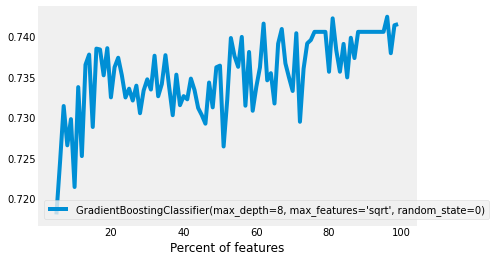

In [90]:
for model in models:
    cv_scores = []
    
    for p in tqdm(range(5,100,1)):
        X_new = SelectPercentile(percentile=p).fit_transform(X_train_cat, y_train)    
        cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=stra).mean()
        cv_scores.append((p,cv_score))

    best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
    print(model.__class__.__name__, best_score)

    plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
    plt.xlabel('Percent of features')
    plt.legend(models)
    plt.grid()

In [91]:
# new_range = [9, 21, 32, 34, 43, 68]

# for model in models:
    
#     cv_scores_mean = []
    
#     for percentile in tqdm(new_range):
    
#         X_new = SelectPercentile(percentile = percentile).fit_transform(X_train_cat, y_train)
#         cv_score = cross_val_score(model, X_new, y_train, scoring='roc_auc', cv=stra)
#         cv_scores_mean.append((percentile, cv_score.mean()))
#         print(cv_score, cv_score.mean())
        

#     best_score = cv_scores_mean[np.argmax([score for _, score in cv_scores_mean])]
#     print(model.__class__.__name__, best_score)
    

#     plt.plot([p for p,_ in cv_scores_mean], [score for _, score in cv_scores_mean])
#     plt.xlabel('Percent of features')
#     plt.legend(loc=0)
#     plt.grid()

In [92]:
fs = SelectPercentile(percentile=best_score[0]).fit(X_train_cat, y_train)
X_train_cat = fs.transform(X_train_cat)
X_test_cat = fs.transform(X_test_cat)

In [93]:
# select_p = SelectPercentile(percentile = 32).fit(X_train_cat, y_train)
# X_train_cat1 = select_p.transform(X_train_cat)
# X_test_cat1 = select_p.transform(X_test_cat)

# 3. Model construction

In [94]:
X_train_cat, X_dev, y_train, y_dev = train_test_split(X_train_cat, y_train, test_size=0.3,  stratify= y_train, random_state=0)

##### models assignment

In [95]:
clfs = [
#     (
#         KNeighborsClassifier(),              
#         {'n_neighbors': range(1,51),        
#          'weights': ['uniform', 'distance'],
#          'metric': ['minkowski', 'euclidean', 'manhattan']}
#     ),
    (
        LogisticRegression(random_state=0),  
        {'C': [1e-07,1e-06,0.0001,0.001,0.01, 1.0],      
         'penalty': ['l1','l2']}
    ),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': range(10, 370),
         'max_depth': range(12, 20, 50),
         'min_impurity_decrease': [0,0.0001,0.001,0.01,0.0002,0.002,0.02,0.0005,0.005,0.05,0.1,0.2,0.3,0.4,0.5],
         'max_features': ['auto', 'sqrt', 'log2'],
         'bootstrap': [True, False],
         'criterion': ['gini', 'entropy'], 
         'class_weight': ['balanced', 'balanced_subsample', {}],
         'min_samples_split': [2, 5, 7, 9, 10],
         'min_samples_leaf': [2, 3, 4, 5, 6]}
    ),
#      (
#          XGBClassifier(random_state=0),
#          {'n_estimators': range(10, 310, 10),
#           'learning_rate': np.arange(0.0, 0.501, 0.001),
#           'subsample': [0.2, 0.3, 0.5, 0.7, 0.9, 1],
#           'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#           'colsample_bytree': [0.5, 0.7, 0.9, 1],
#           'min_child_weight': [1, 2, 3, 4],
#           'reg_alpha': [1e-07,1e-06,0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
#           'reg_lambda': [1e-07,1e-06,0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
#           'scale_pos_weight': np.arange(0.0, 50.1, 0.1)}
#    ),
#     (
#         LGBMClassifier(random_state=0),
#         {'n_estimators': range(10, 310, 10),
#          'learning_rate': np.arange(0.0, 0.501, 0.001),
#          'num_leaves': [10,20,30,40,50,60,70,80,90,100,150,200],
#          'min_split_gain': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#          'reg_alpha': [1e-07,1e-06,0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
#          'reg_lambda': [1e-07,1e-06,0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
#          'feature_fraction': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#          'bagging_fraction': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#          'bagging_freq': [1, 2, 3, 4, 5, 6, 7],
#          'min_child_samples': range(5,105,5)}
#      ),
#       (
#          ExtraTreesClassifier(random_state=0),
#          {'n_estimators': [370, 400, 500, 700],
#           'max_depth': [50, 75, 90, 100, 200, 300],
#           'max_features' : [20, 30, 40, 50, 60, 70],
#           'criterion' : ['entropy', 'gini']}
#       ),
#      (
#         CatBoostClassifier(random_state=0, verbose=False),
#         {'n_estimators': range(10, 310, 10),
#          'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#          'random_strength': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
#          'l2_leaf_reg': [1,2,3,4,5,6,7,8,9,10,20,30,50,100,200]}
#     ),
#     (
#         GradientBoostingClassifier(random_state=0),
#         {'n_estimators': range(10, 310, 10),
#          'learning_rate': np.arange(0.0, 0.501, 0.001),
#          'min_samples_split': [2, 4, 5, 7, 9, 10],
#          'min_samples_leaf': [1, 2, 3, 4, 5],
#          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#          'min_impurity_decrease': [0,0.0001,0.001,0.01,0.0002,0.002,0.02,0.0005,0.005,0.05,0.1,0.2,0.3,0.4,0.5],
#          'max_features': ['auto', 'sqrt', 'log2']}
#     ),
#     (
#         AdaBoostClassifier(random_state=0),
#         {'n_estimators': [100, 200, 300],
#          'learning_rate': [1, 0.1, 0.01, 0.001],}
#     ),
    (
        MLPClassifier(random_state=0),
        {'batch_size': [32, 64, 128],
         'learning_rate' : ['constant', 'adaptive', 'invscaling'],
         'activation': ['tanh', 'relu', 'logistic'],
         'solver': ['sgd', 'adam'],
         'alpha': [1e-07,1e-06,0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,0.9],
         'hidden_layer_sizes': [(32,),(64,),(128,),(32,16),(64,32,16)]}
    )
]

## Running the models

### Standarized data

In [97]:
clfs_tuned = []  

for clf, param_grid in tqdm(clfs):
    start = time.time()
    clf_name = type(clf).__name__
    iterations = 150 if clf_name in ['MLPClassifier'] else 250
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=iterations, scoring='roc_auc', 
                                     cv=stra, random_state=0, n_jobs=-1)
    rand_search.fit(X_train_cat, y_train)
    clf_score = rand_search.score(X_dev, y_dev)
    print((clf_name, clf_score))
    clfs_tuned.append((clf_name, rand_search, clf_score))

 33%|███▎      | 1/3 [00:03<00:06,  3.31s/it]

('LogisticRegression', 0.7858691661030051)


 67%|██████▋   | 2/3 [03:04<00:56, 56.61s/it]

('RandomForestClassifier', 0.7824601410764326)


100%|██████████| 3/3 [19:07<00:00, 382.49s/it]

('MLPClassifier', 0.7838709054014882)


In [98]:
for i in range(len(clfs_tuned)):
    print('{}: {}\n'.format(clfs_tuned[i][0] , clfs_tuned[i][1].best_params_))

LogisticRegression: {'penalty': 'l2', 'C': 0.001}

RandomForestClassifier: {'n_estimators': 246, 'min_samples_split': 10, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.002, 'max_features': 'sqrt', 'max_depth': 12, 'criterion': 'entropy', 'class_weight': {}, 'bootstrap': False}

MLPClassifier: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (128,), 'batch_size': 128, 'alpha': 0.1, 'activation': 'logistic'}



# 5. **Model Ensemble**

### Standarized data

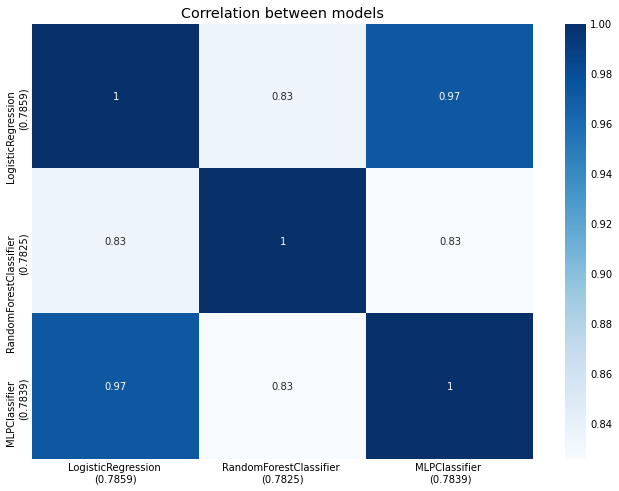

In [99]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_dev)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

plt.figure(figsize = (10,8))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [100]:
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

LogisticRegression \n(0.7859)        0.903955
RandomForestClassifier \n(0.7825)    0.830538
MLPClassifier \n(0.7839)             0.899504
dtype: float64

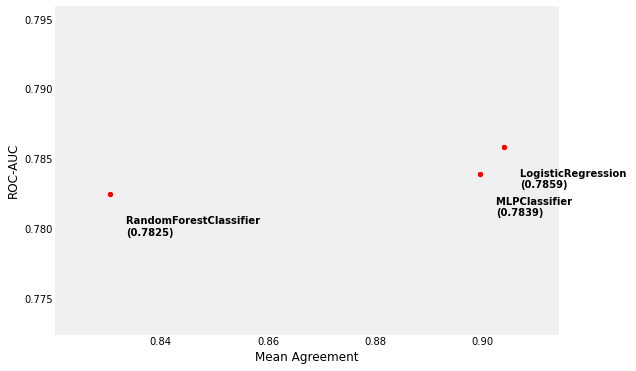

In [101]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

## Averaging voting

### Standarized data

In [102]:
selected = [
#     'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
#     'GradientBoostingClassifier',
#     'AdaBoostClassifier',
#     'CatboostClassifier',
#     'XGBClassifier',
#     'LGBMClassifier'
]

models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [103]:
max_score = 0
for p in tqdm([0, 1, 2.56]):  
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_dev)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_dev)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_dev, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|██████████| 3/3 [00:00<00:00,  5.22it/s]

p=2.56
RandomForestClassifier●MLPClassifier
0.7963126872161562


In [104]:
class AveragingClassifier(ClassifierMixin):
    def __init__(self, estimators, p):
        self.estimators = estimators
        self.p = p
    
    def fit(self, X, y):
        return None

    def predict(self, X):
        if self.p == 0:
            pred = gmean([clf.predict(X) for name, clf in estimators], axis=0)
        else:
            preds = [clf.predict(X) for name, clf in estimators]
            pred = (np.sum(np.array(preds)**self.p, axis=0) / len(self.estimators))**(1/self.p)
        return pred
         
    def predict_proba(self, X):
        if self.p == 0:
            prob = gmean([clf.predict_proba(X) for name, clf in estimators], axis=0)
        else:
            probs = [clf.predict_proba(X) for name, clf in estimators]
            prob = (np.sum(np.array(probs)**self.p, axis=0) / len(self.estimators))**(1/self.p)
        return prob
    
estimators = [(name, clf) for name, clf, _ in models]
avg_clf = AveragingClassifier(estimators, p)
avg_clf.fit(X_train_cat, y_train)   

## stacking

### Standarized data

In [105]:
# # 2-layer stacking
# selected1 = [
# #     'KNeighborsClassifier', 
#     'MLPClassifier',
#     'LogisticRegression', 
#     'RandomForestClassifier', 
# #     'GradientBoostingClassifier',
# #     'AdaBoostClassifier',
# #     'CatboostClassifier',
# #     'XGBClassifier',
# #     'LGBMClassifier'
# ]

# estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected1]
# stk_clf = StackingClassifier(
#     estimators=estimators, final_estimator = LogisticRegression(random_state=0), cv=5)

# stk_clf.fit(X_train_cat, y_train)
# print(roc_auc_score(y_dev, stk_clf.predict_proba(X_dev)[:,1]))

# 7. **Deployment**

In [106]:
# Averaging ensemble을 적용한 submission: (결과)
pd.DataFrame({'cust_id':np.arange(3500, 5982), 'gender': avg_clf.predict_proba(X_test_cat)[:,1]}).to_csv('송한솔_01.csv', index=False)
# Stacking ensemble을 적용한 submission: (결과)
# pd.DataFrame({'cust_id':np.arange(3500, 5982), 'gender': stk_clf.predict_proba(X_test_cat)[:,1]}).to_csv('송한솔-11-26-01.csv', index=False)

# END